In [1]:
import numpy as np
import pyuvdata
import matplotlib.pyplot as plt
import matplotlib
from dwcal import delay_weighted_cal as dwcal

In [2]:
cal_vanilla = pyuvdata.UVCal()
#cal_vanilla.read_calfits('/Users/ruby/Astro/dwcal_tests_Apr2022/caltest_newtons_method_Apr22/vanilla_cal.calfits')
cal_vanilla.read_calfits('/Users/ruby/Astro/dwcal_tests_Apr2022/caltest_Apr12/vanilla_cal.calfits')
cal_dw = pyuvdata.UVCal()
#cal_dw.read_calfits('/Users/ruby/Astro/dwcal_tests_Apr2022/caltest_newtons_method_Apr22/wedge_excluded.calfits')
cal_dw.read_calfits('/Users/ruby/Astro/dwcal_tests_Apr2022/caltest_Apr12/wedge_excluded.calfits')

telescope_location is not set. Using known values for mwa.


In [66]:
def plot_gains_per_freq(cal, title=""):
    for ant_ind in range(cal.Nants_data):
        plt.plot(np.squeeze(cal.freq_array)/1e6, np.abs(cal.gain_array[ant_ind,0,:,0,0]))
        plt.xlim([np.min(cal.freq_array)/1e6, np.max(cal.freq_array)/1e6])
        plt.ylim([1-.005,1+.005])
        plt.xlabel('Frequency (MHz)')
        plt.ylabel('Gain Amplitude')
    plt.plot([np.min(cal.freq_array)/1e6, np.max(cal.freq_array)/1e6], [1,1], color='white', linestyle='--', linewidth=0.9)
    plt.title(title)
    plt.show()
    
def plot_gains_error_per_freq(cal, title=""):
    for ant_ind in range(cal.Nants_data):
        plt.plot(np.squeeze(cal.freq_array)/1e6, np.abs(cal.gain_array[ant_ind,0,:,0,0]))
        plt.xlim([np.min(cal.freq_array)/1e6, np.max(cal.freq_array)/1e6])
        plt.ylim([0,.005])
        plt.xlabel('Frequency (MHz)')
        plt.ylabel('Gain Amplitude')
    plt.plot([np.min(cal.freq_array)/1e6, np.max(cal.freq_array)/1e6], [1,1], color='white', linestyle='--', linewidth=0.9)
    plt.title(title)
    plt.show()
    
def plot_gains_per_freq_diff(cal_1, cal_2, title=""):
    for ant_ind in range(cal_1.Nants_data):
        plot_diff = np.abs(cal_1.gain_array[ant_ind,0,:,0,0]-1) - np.abs(cal_2.gain_array[ant_ind,0,:,0,0]-1)
        plt.plot(np.squeeze(cal_1.freq_array)/1e6, plot_diff)
        plt.xlim([np.min(cal_1.freq_array)/1e6, np.max(cal_1.freq_array)/1e6])
        plt.ylim([-.005,.005])
        plt.xlabel('Frequency (MHz)')
        plt.ylabel('Gain Amplitude')
    plt.plot([np.min(cal_1.freq_array)/1e6, np.max(cal_1.freq_array)/1e6], [0,0], color='white', linestyle='--', linewidth=0.9)
    plt.title(title)
    plt.show()
    
def plot_gains_delay(cal, title=""):
    delay_array = np.fft.fftfreq(cal.Nfreqs, d=cal.channel_width)
    delay_array = np.fft.fftshift(delay_array)
    avg_gain_amp_sum = 0.
    for ant_ind in range(cal.Nants_data):
        gains_fft = np.fft.fftshift(np.fft.fft(cal.gain_array[ant_ind,0,:,0,0]-1))
        plt.plot(delay_array, np.abs(gains_fft))
        avg_gain_amp_sum += np.mean(np.abs(gains_fft))
    print(f"Average amplitude: {avg_gain_amp_sum/cal.Nants_data}")
    plt.ylim([0.0001,.3])
    plt.yscale("log")
    plt.xlim([np.min(delay_array), np.max(delay_array)])
    plt.xlabel('Delay (s)')
    plt.ylabel('Gain Error Amp.')
    plt.title(title)
    plt.show()
    
def plot_gains_error_delay(cal, title=""):
    delay_array = np.fft.fftfreq(cal.Nfreqs, d=cal.channel_width)
    delay_array = np.fft.fftshift(delay_array)
    avg_gain_amp_sum = 0.
    for ant_ind in range(cal.Nants_data):
        gains_fft = np.fft.fftshift(np.fft.fft(cal.gain_array[ant_ind,0,:,0,0]))
        plt.plot(delay_array, np.abs(gains_fft))
        avg_gain_amp_sum += np.mean(np.abs(gains_fft))
    print(f"Average amplitude: {avg_gain_amp_sum/cal.Nants_data}")
    plt.ylim([0.0001,.3])
    plt.yscale("log")
    plt.xlim([np.min(delay_array), np.max(delay_array)])
    plt.xlabel('Delay (s)')
    plt.ylabel('Gain Error Amp.')
    plt.title(title)
    plt.show()
    
def plot_gains_delay_diff(cal_1, cal_2, title=""):
    delay_array = np.fft.fftfreq(cal_1.Nfreqs, d=cal_1.channel_width)
    delay_array = np.fft.fftshift(delay_array)
    for ant_ind in range(cal_1.Nants_data):
        gains_fft_1 = np.fft.fftshift(np.fft.fft(cal_1.gain_array[ant_ind,0,:,0,0]-1))
        gains_fft_2 = np.fft.fftshift(np.fft.fft(cal_2.gain_array[ant_ind,0,:,0,0]-1))
        gains_fft_diff = np.abs(gains_fft_1)-np.abs(gains_fft_2)
        plt.plot(delay_array, gains_fft_diff)
    plt.plot([np.min(delay_array), np.max(delay_array)], [0, 0], color='white', linestyle='--', linewidth=0.9)
    plt.ylim([-.2,.2])
    plt.xlim([np.min(delay_array), np.max(delay_array)])
    plt.xlabel('Delay (s)')
    plt.ylabel('Gain Error Amp.')
    plt.title(title)
    plt.show()

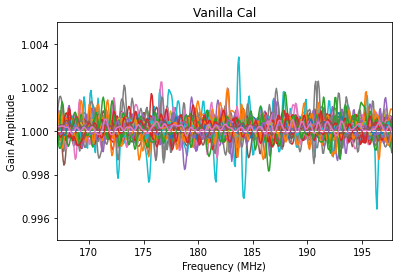

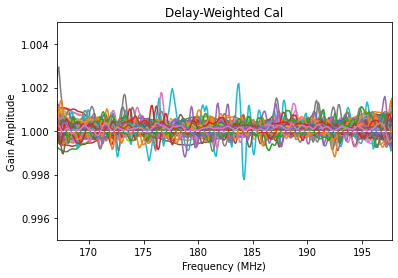

In [57]:
plot_gains_per_freq(cal_vanilla, title="Vanilla Cal")
plot_gains_per_freq(cal_dw, title="Delay-Weighted Cal")

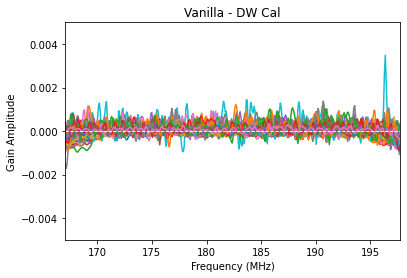

In [5]:
plot_gains_per_freq_diff(cal_vanilla, cal_dw, title="Vanilla - DW Cal")

Average amplitude: 0.0031431304418914493


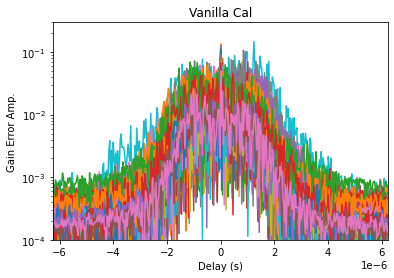

Average amplitude: 0.002218011651609777


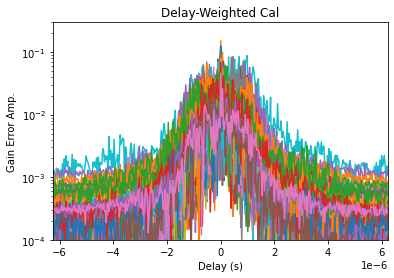

In [6]:
plot_gains_delay(cal_vanilla, title="Vanilla Cal")
plot_gains_delay(cal_dw, title="Delay-Weighted Cal")

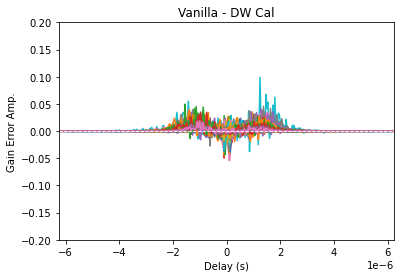

In [7]:
plot_gains_delay_diff(cal_vanilla, cal_dw, title="Vanilla - DW Cal")

In [8]:
cal_fhd = pyuvdata.UVCal()
cal_fhd.read_fhd_cal(
    "/Users/ruby/Astro/FHD_outputs/fhd_rlb_model_GLEAM_bright_sources_Apr2022/calibration/1061316296_cal.sav",
    "/Users/ruby/Astro/FHD_outputs/fhd_rlb_model_GLEAM_bright_sources_Apr2022/metadata/1061316296_obs.sav",
    layout_file="/Users/ruby/Astro/FHD_outputs/fhd_rlb_model_GLEAM_bright_sources_Apr2022/metadata/1061316296_layout.sav"
)
# FHD gain convention is opposite that of DWCal. To reconcile, take the reciprocal of the gains:
cal_fhd.gain_array = 1/cal_fhd.gain_array

Telescope location derived from obs lat/lon/alt values does not match the location in the layout file. Using the value from known_telescopes.
No settings file, history will be incomplete


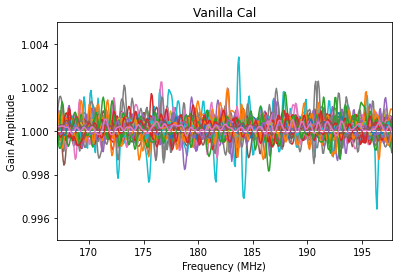

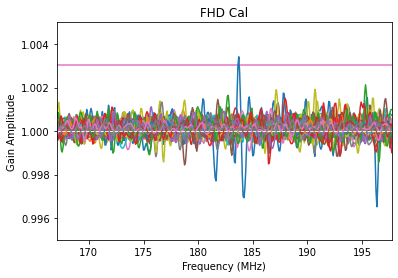

In [9]:
plot_gains_per_freq(cal_vanilla, title="Vanilla Cal")
plot_gains_per_freq(cal_fhd, title="FHD Cal")

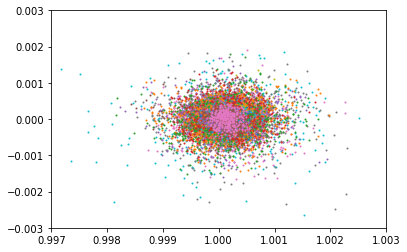

In [10]:
for ant in range(np.shape(cal_vanilla.gain_array)[0]):
    plt.scatter(
        np.real(cal_vanilla.gain_array[ant, 0, :, 0, 0]),
        np.imag(cal_vanilla.gain_array[ant, 0, :, 0, 0]),
        s=1
    )
    plt.xlim([1-3e-3, 1+3e-3])
    plt.ylim([-3e-3, 3e-3])
plt.show()

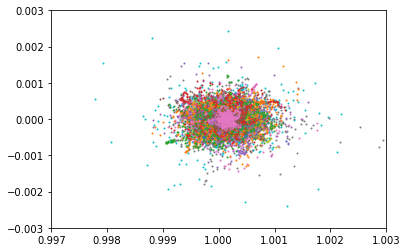

In [11]:
for ant in range(np.shape(cal_dw.gain_array)[0]):
    plt.scatter(
        np.real(cal_dw.gain_array[ant, 0, :, 0, 0]),
        np.imag(cal_dw.gain_array[ant, 0, :, 0, 0]),
        s=1
    )
    plt.xlim([1-3e-3, 1+3e-3])
    plt.ylim([-3e-3, 3e-3])
plt.show()

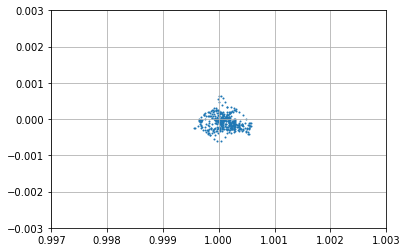

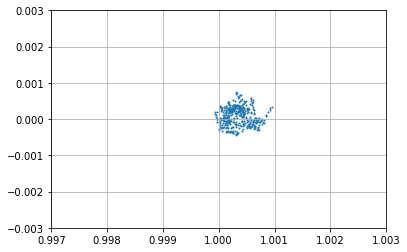

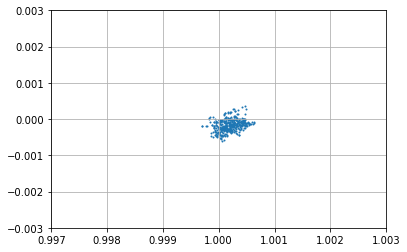

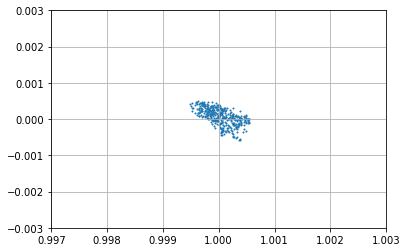

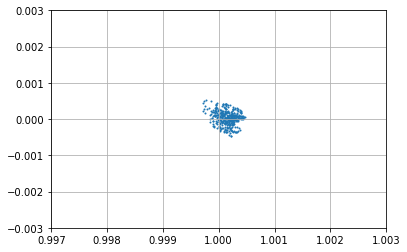

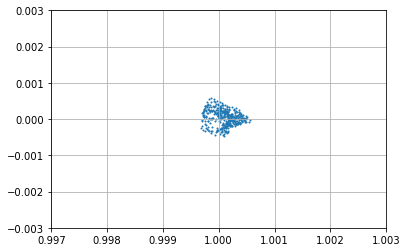

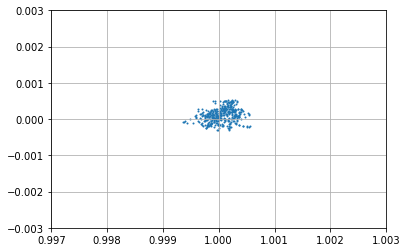

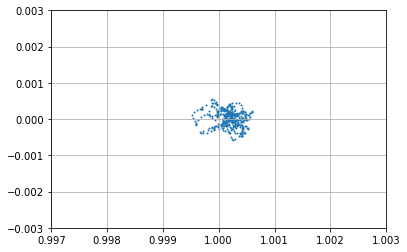

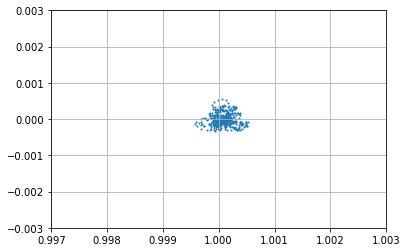

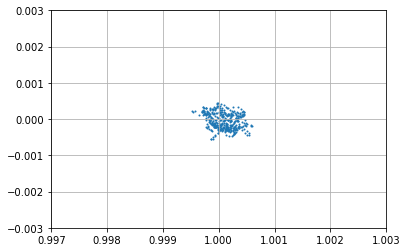

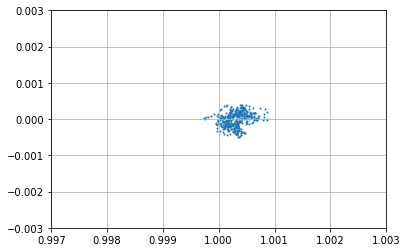

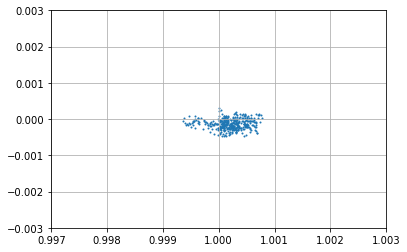

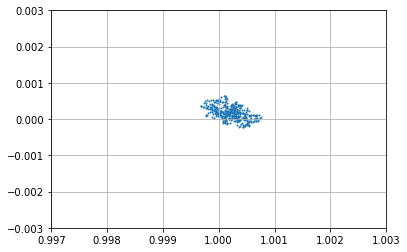

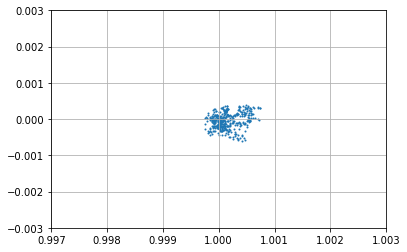

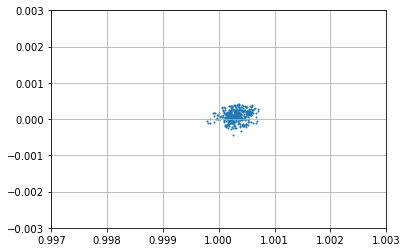

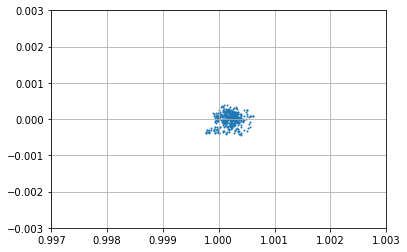

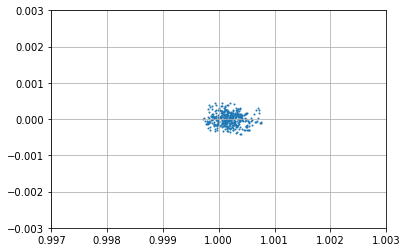

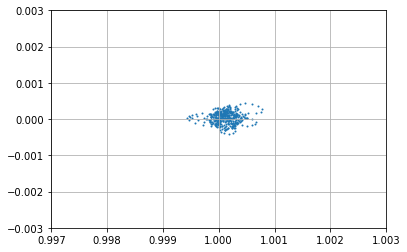

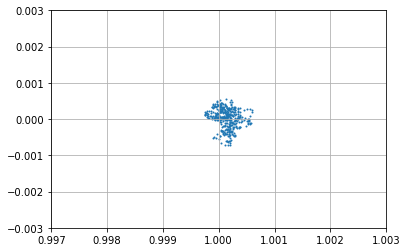

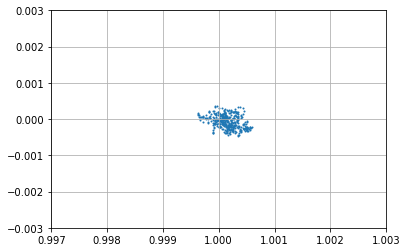

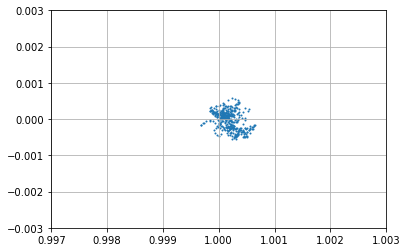

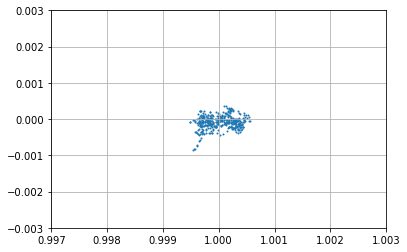

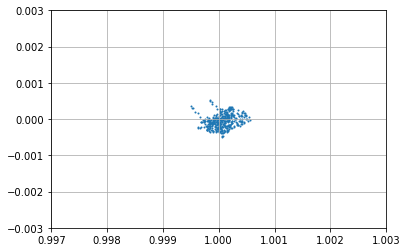

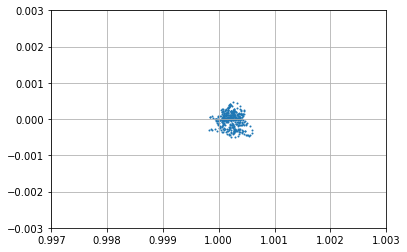

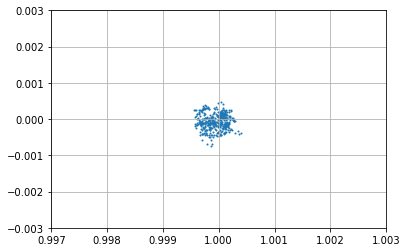

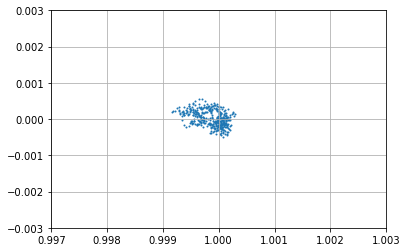

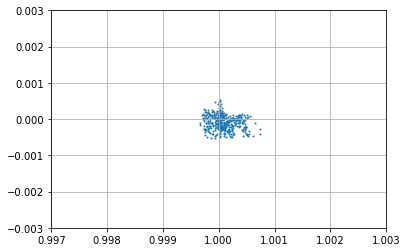

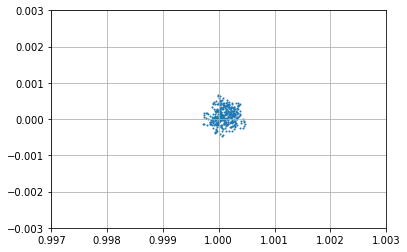

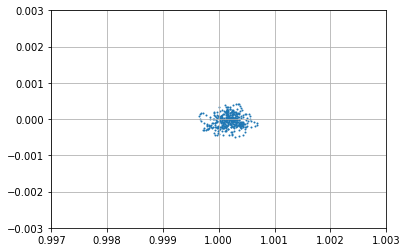

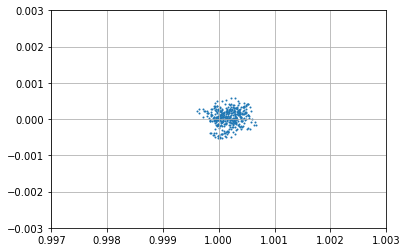

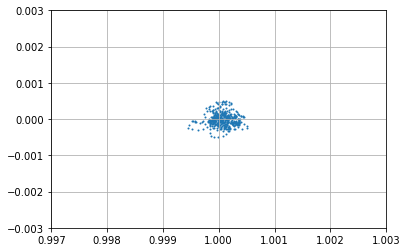

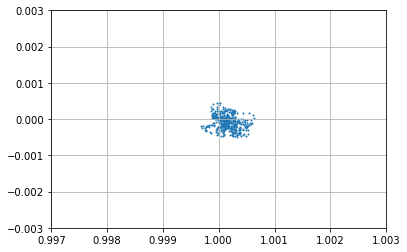

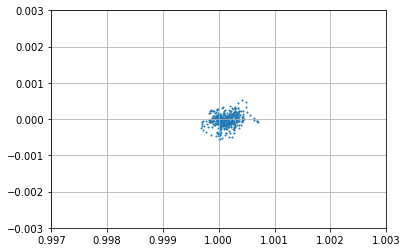

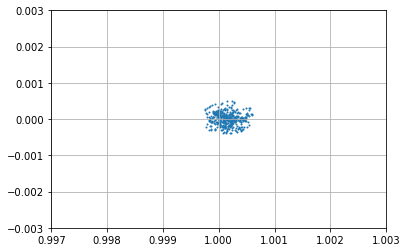

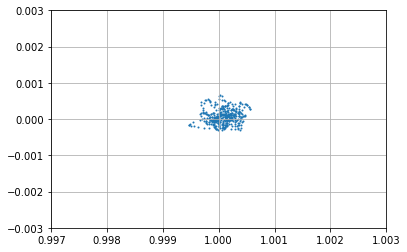

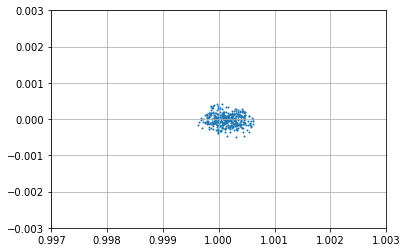

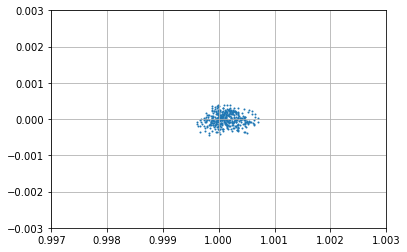

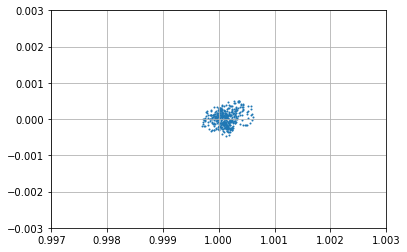

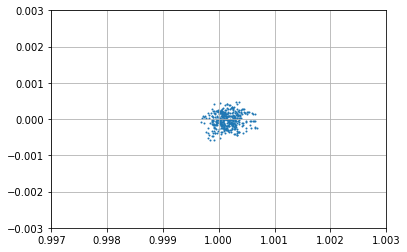

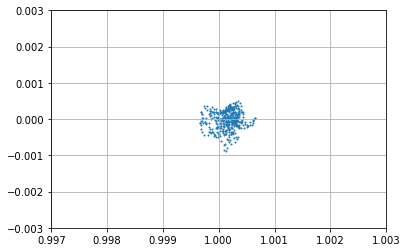

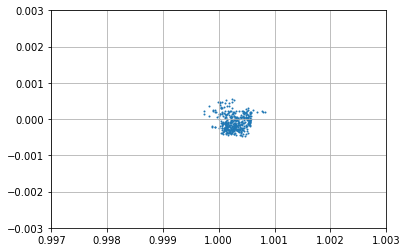

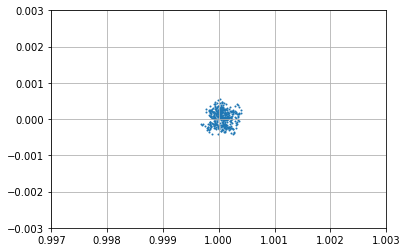

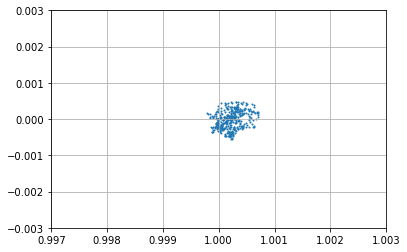

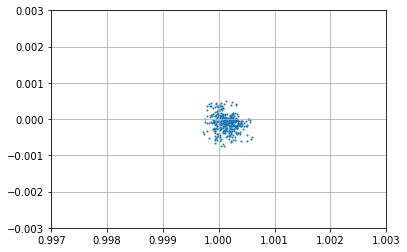

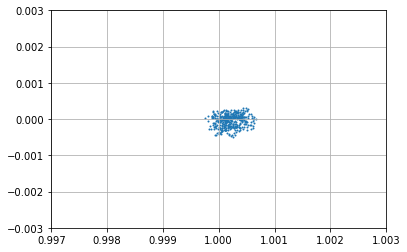

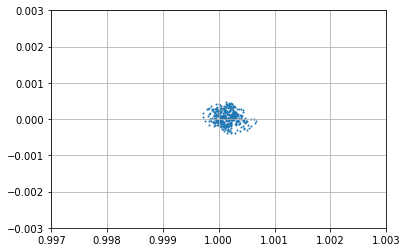

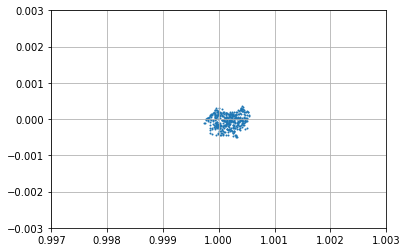

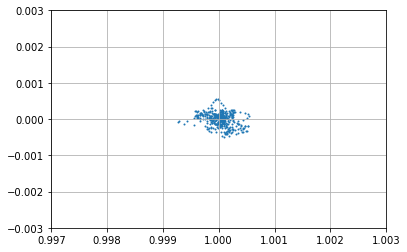

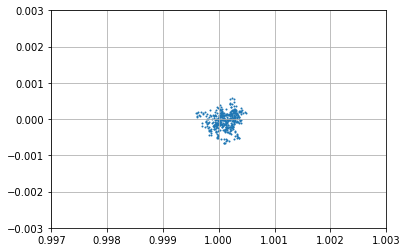

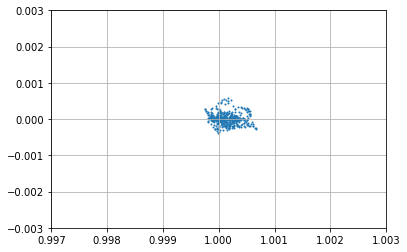

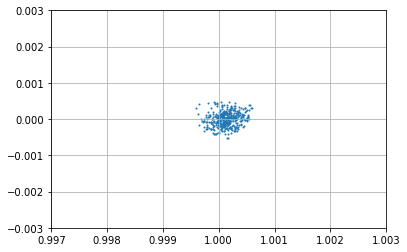

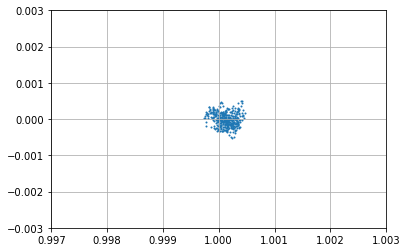

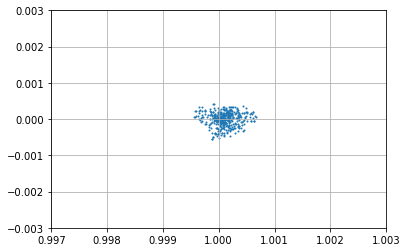

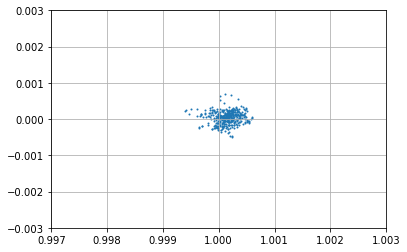

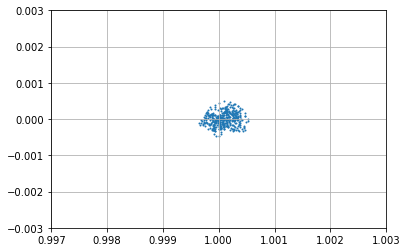

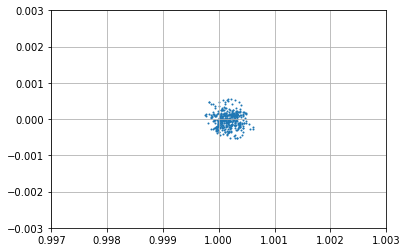

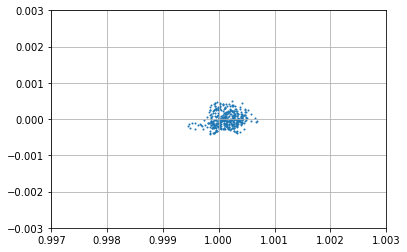

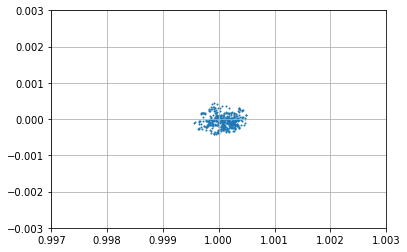

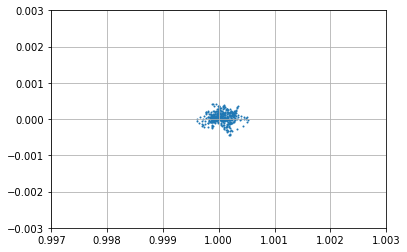

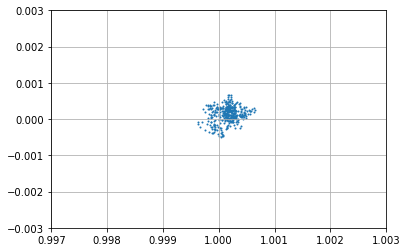

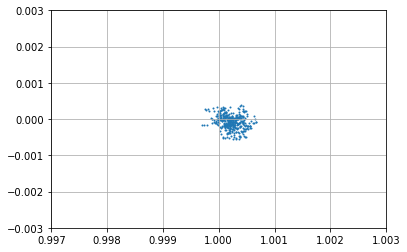

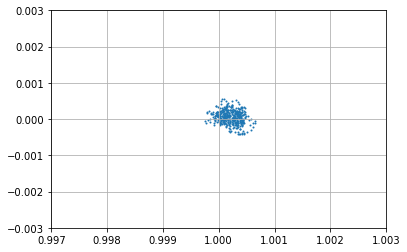

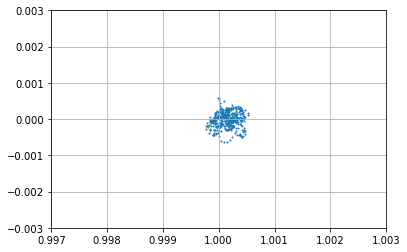

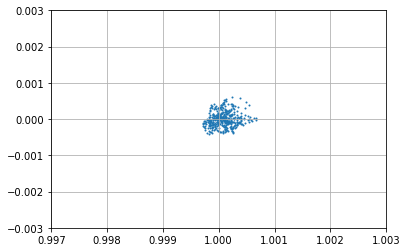

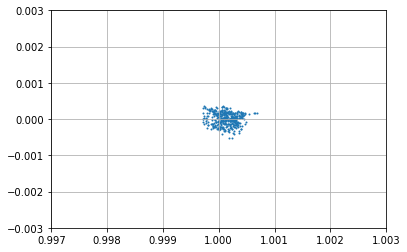

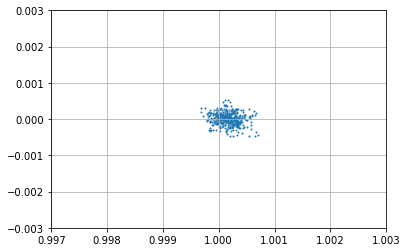

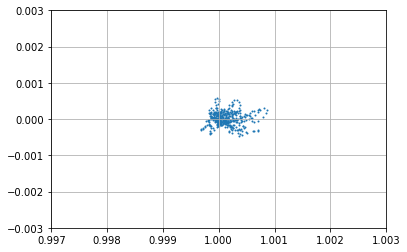

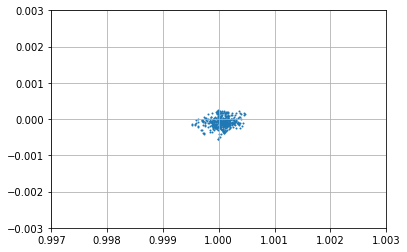

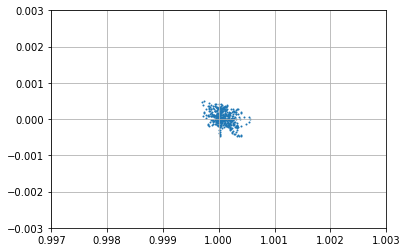

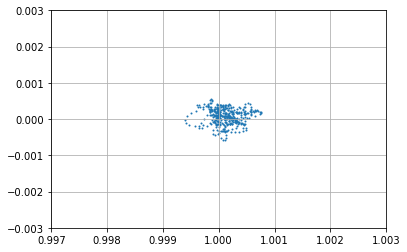

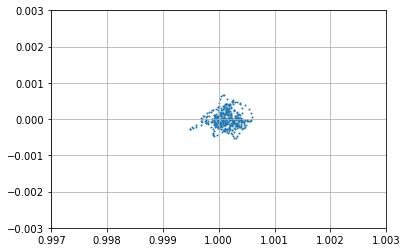

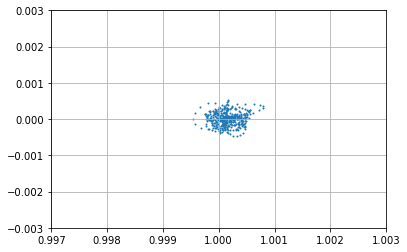

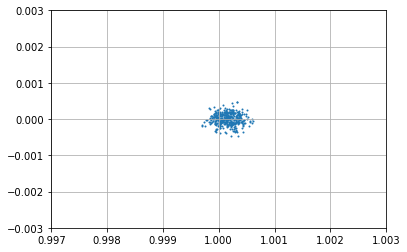

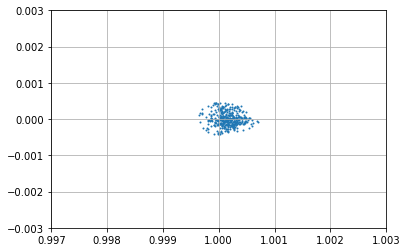

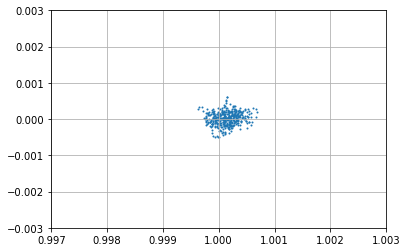

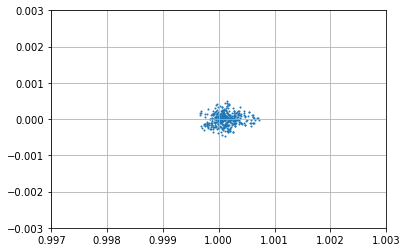

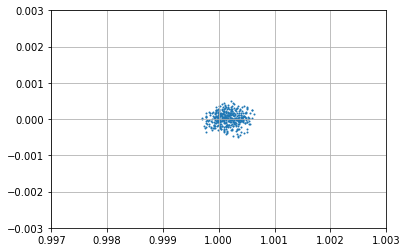

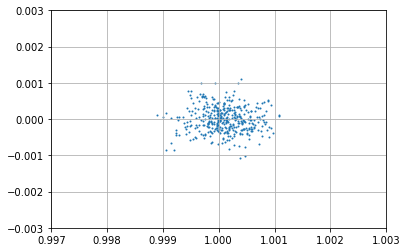

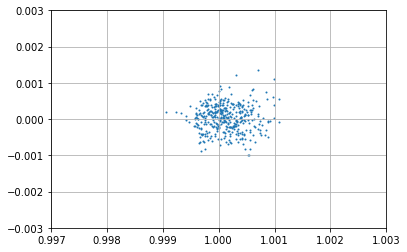

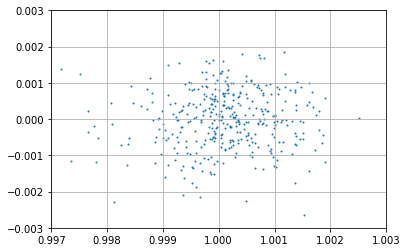

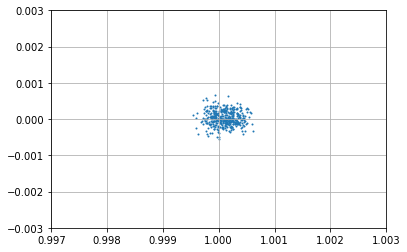

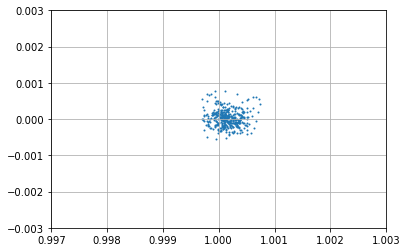

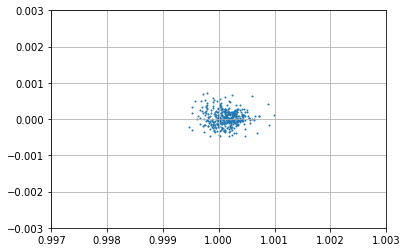

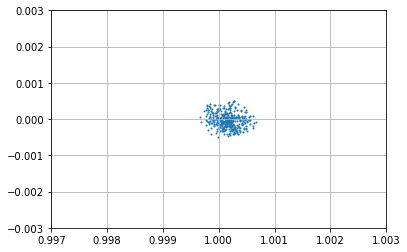

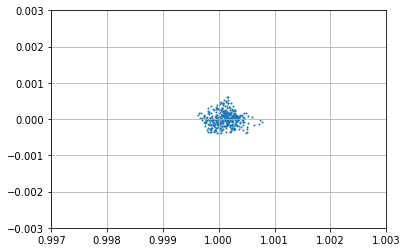

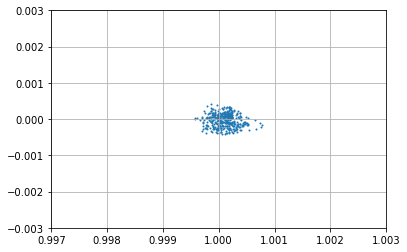

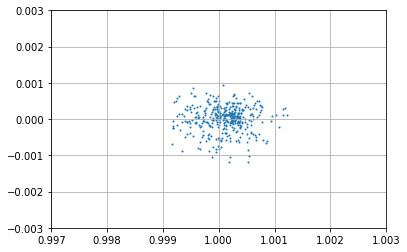

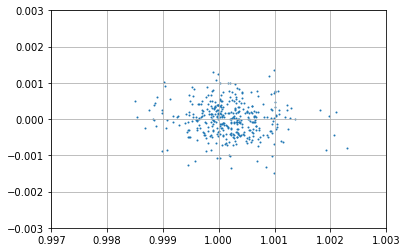

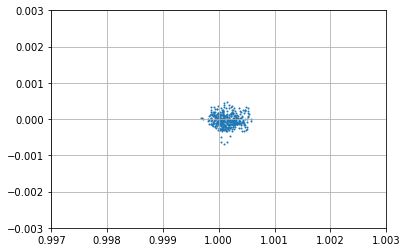

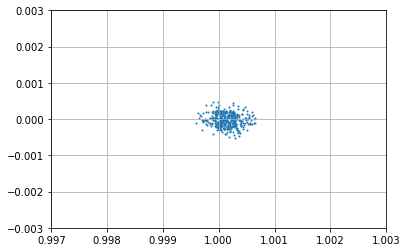

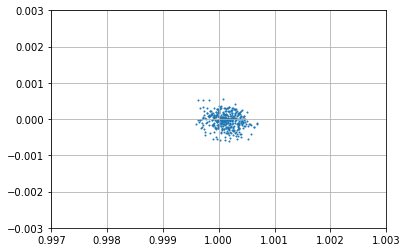

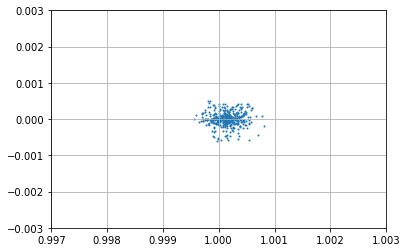

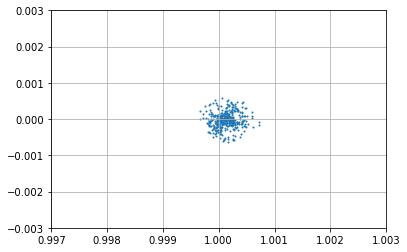

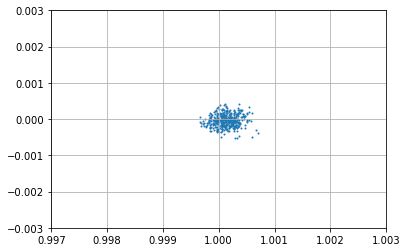

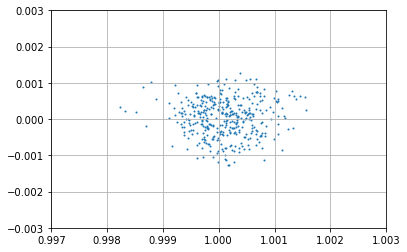

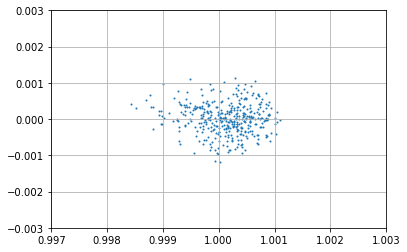

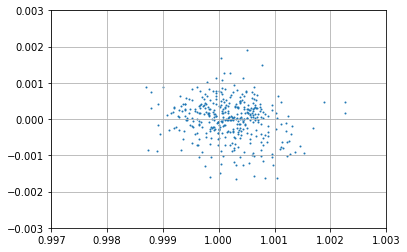

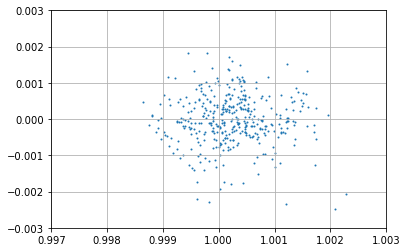

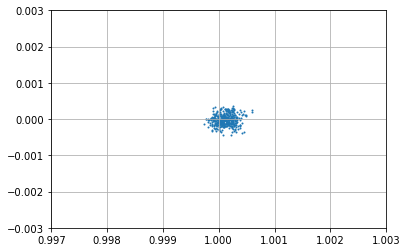

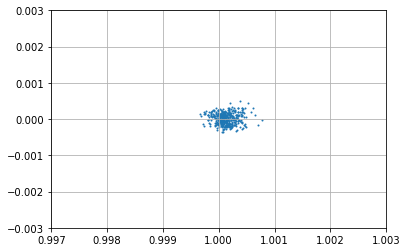

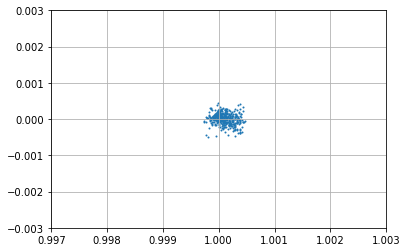

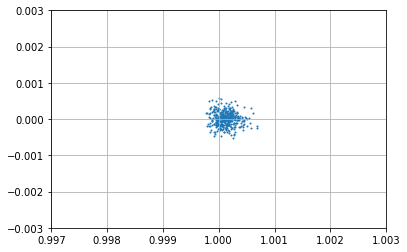

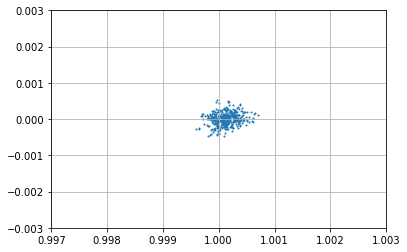

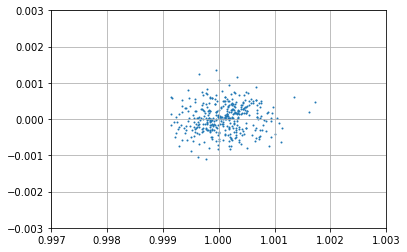

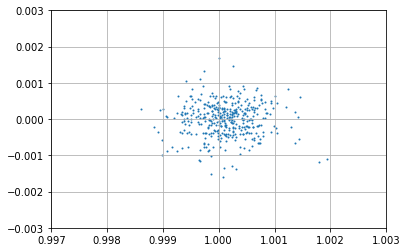

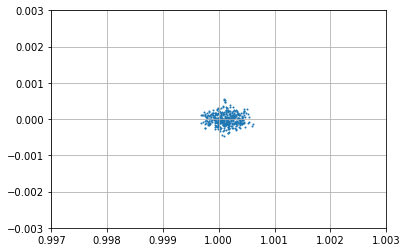

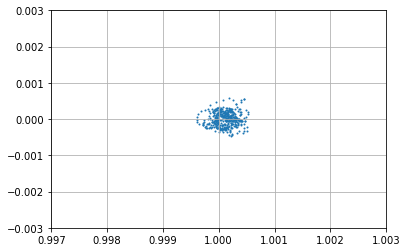

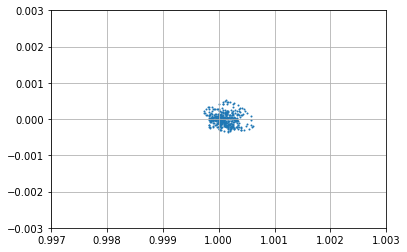

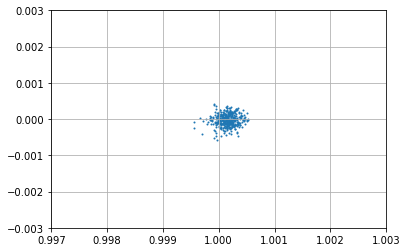

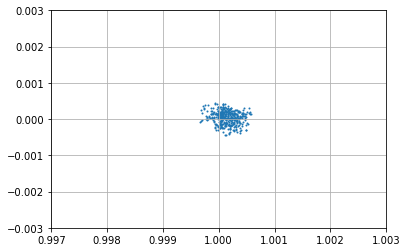

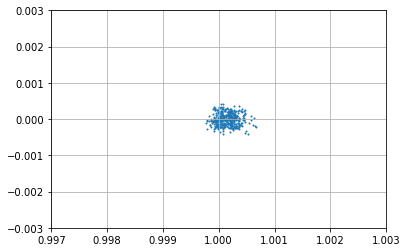

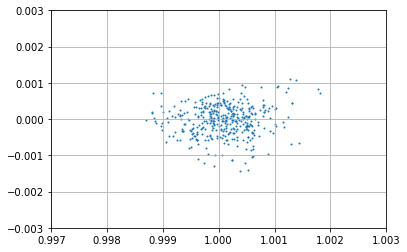

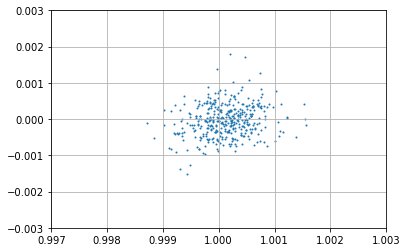

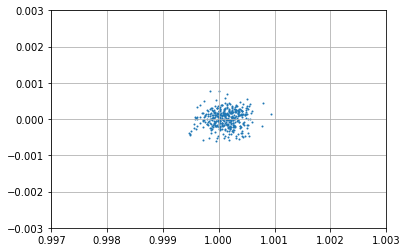

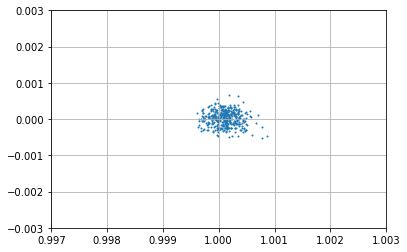

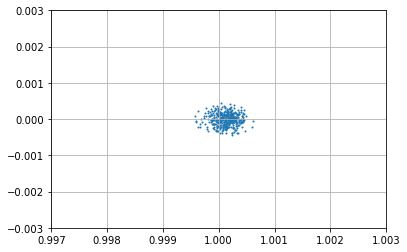

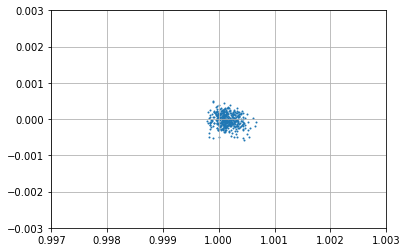

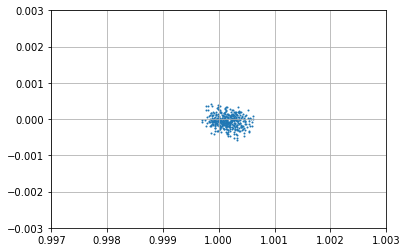

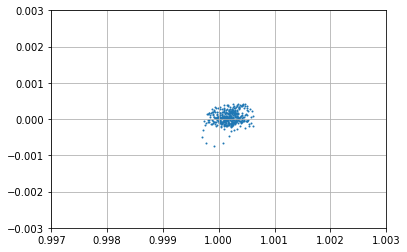

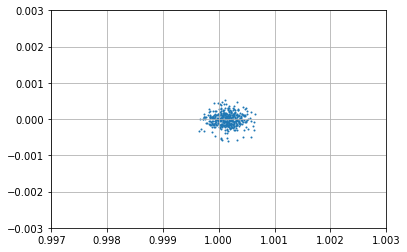

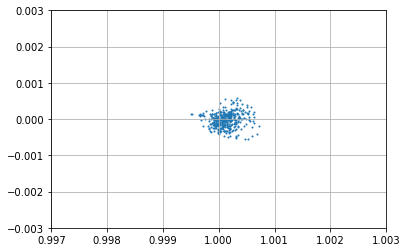

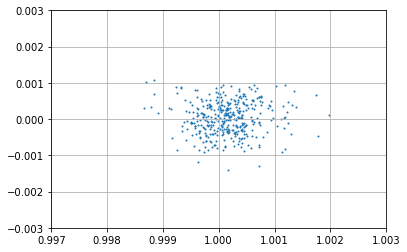

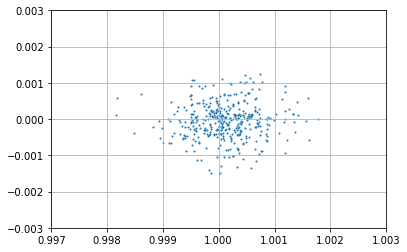

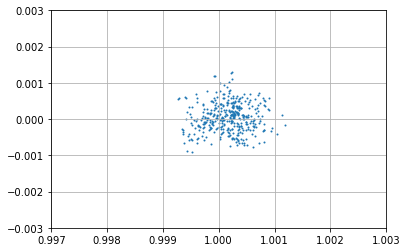

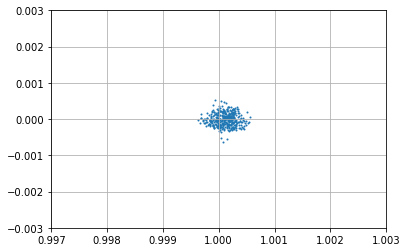

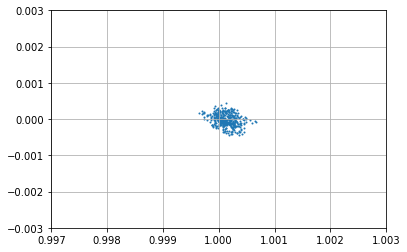

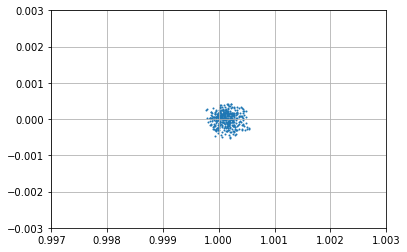

In [12]:
for ant in range(np.shape(cal_vanilla.gain_array)[0]):
    plt.scatter(
        np.real(cal_vanilla.gain_array[ant, 0, :, 0, 0]),
        np.imag(cal_vanilla.gain_array[ant, 0, :, 0, 0]),
        s=1
    )
    plt.xlim([1-3e-3, 1+3e-3])
    plt.ylim([-3e-3, 3e-3])
    plt.grid()
    plt.show()

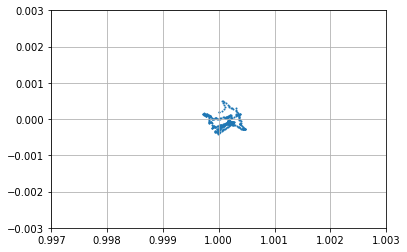

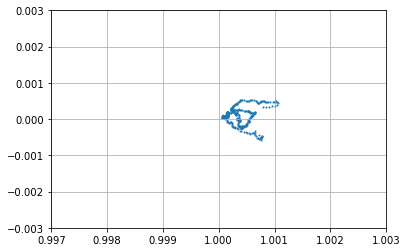

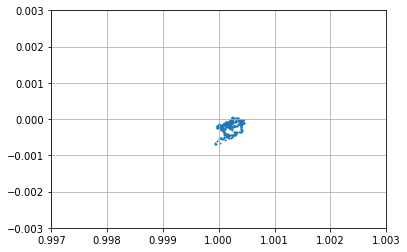

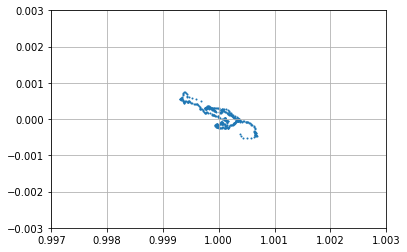

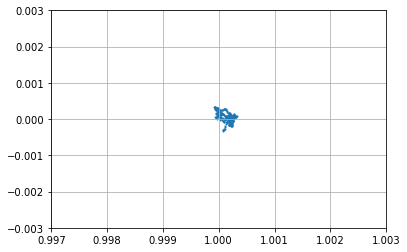

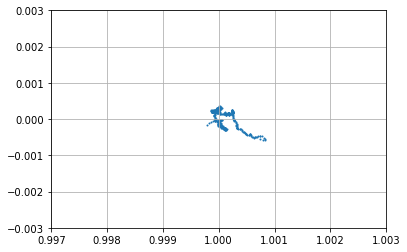

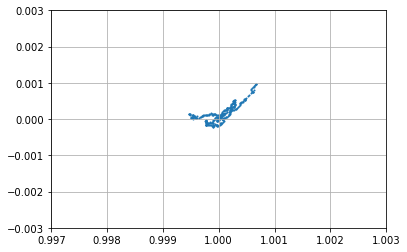

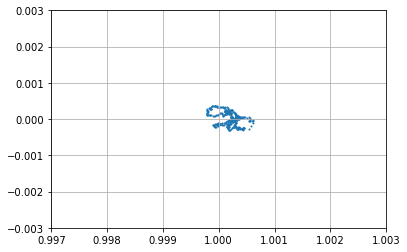

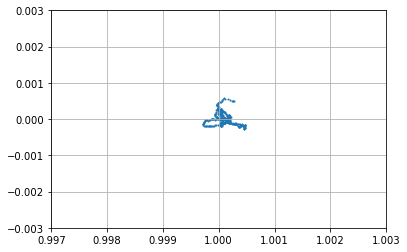

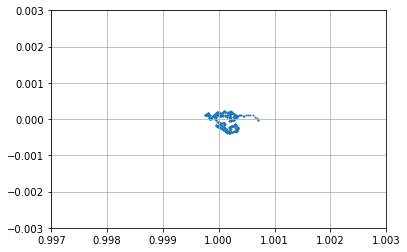

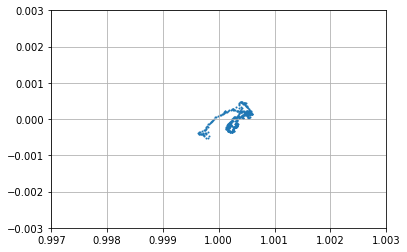

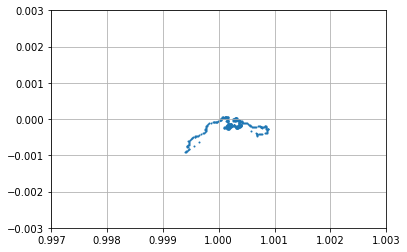

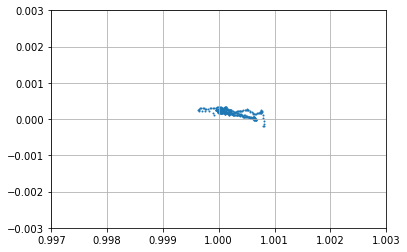

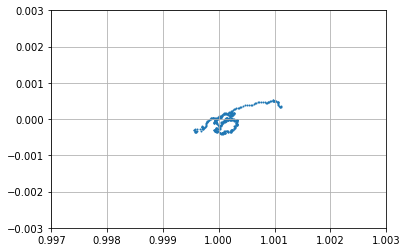

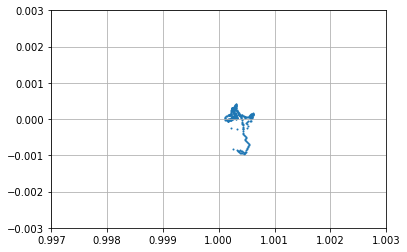

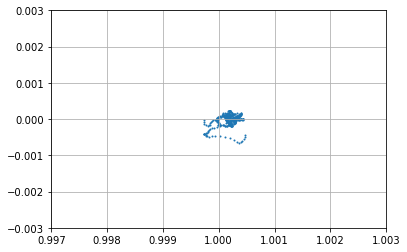

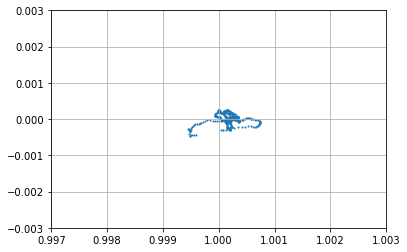

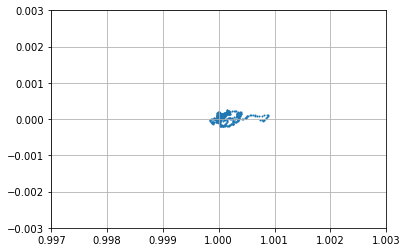

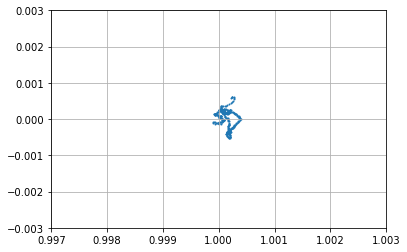

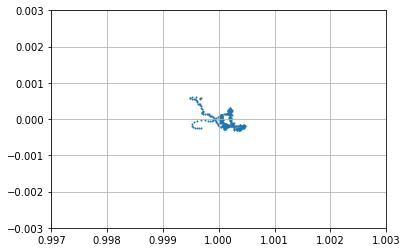

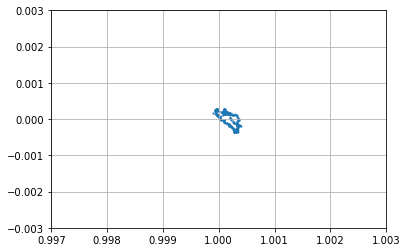

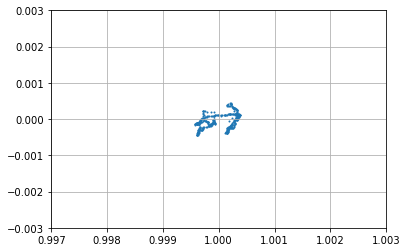

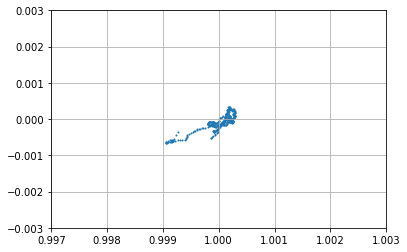

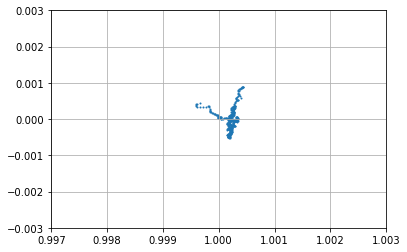

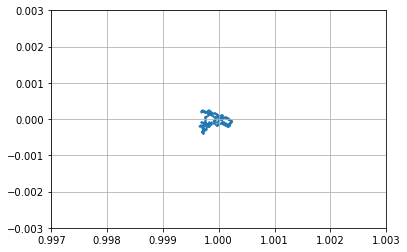

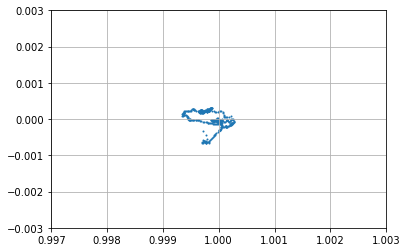

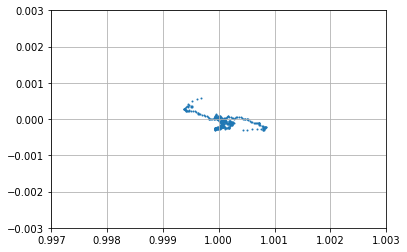

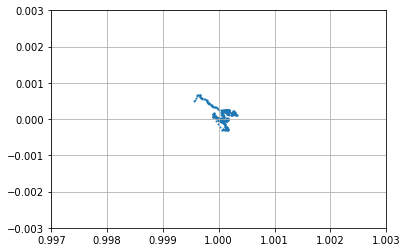

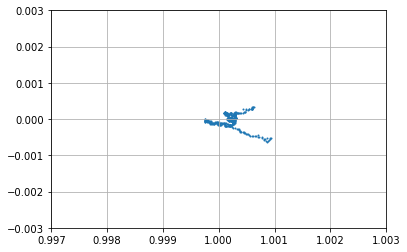

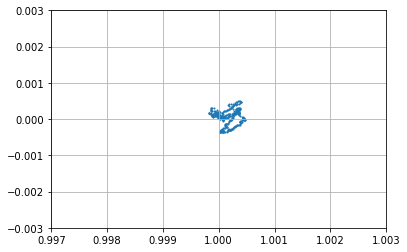

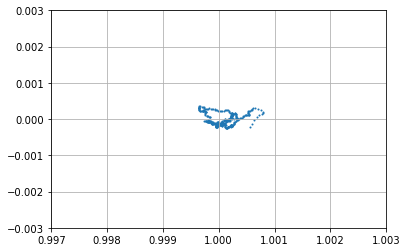

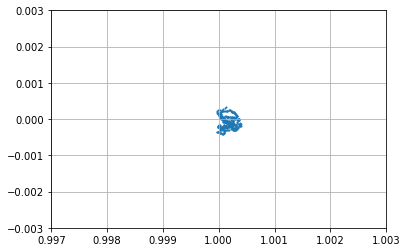

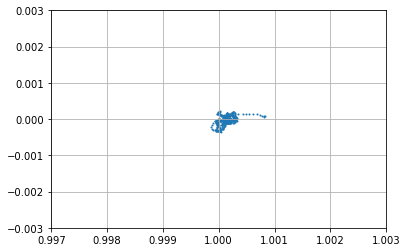

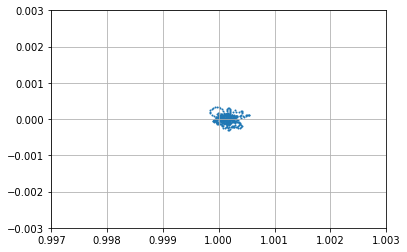

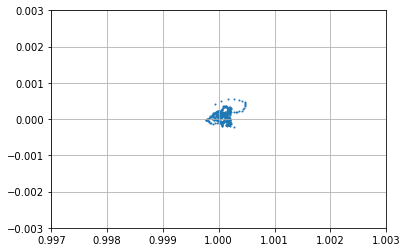

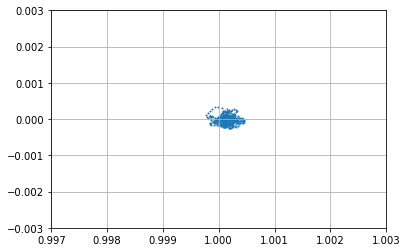

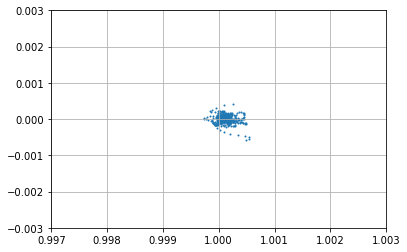

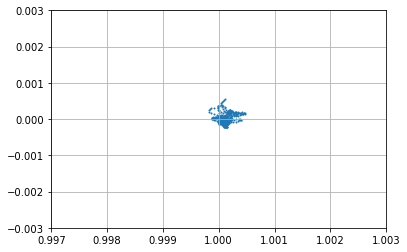

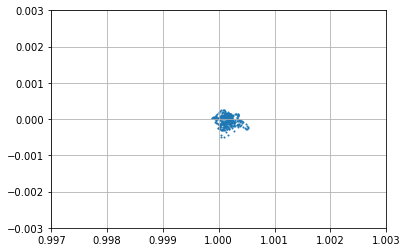

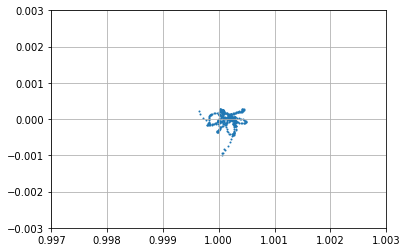

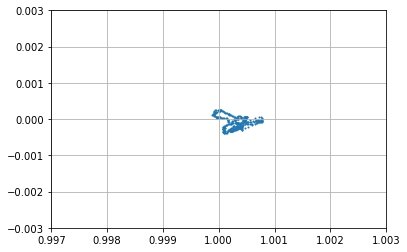

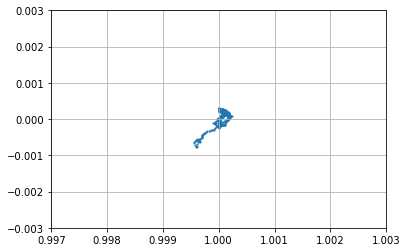

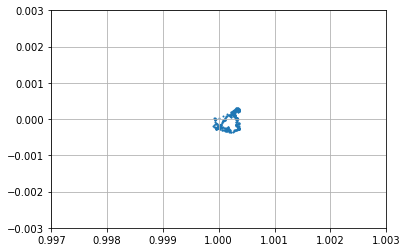

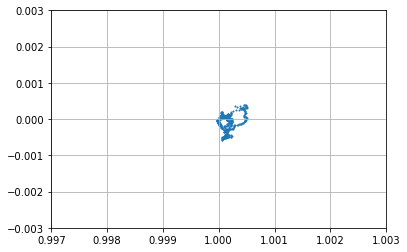

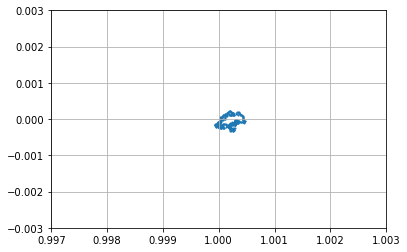

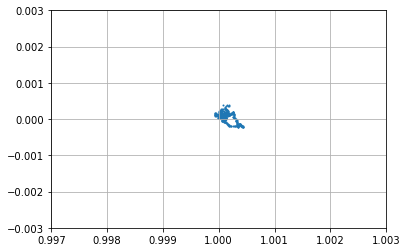

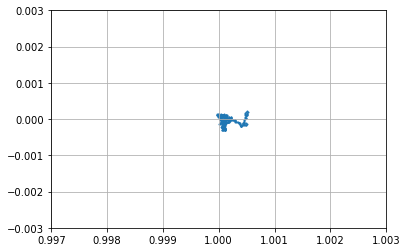

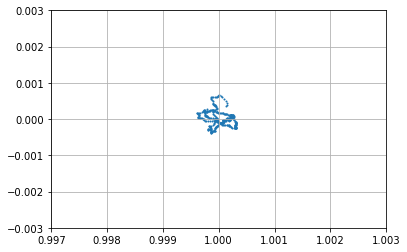

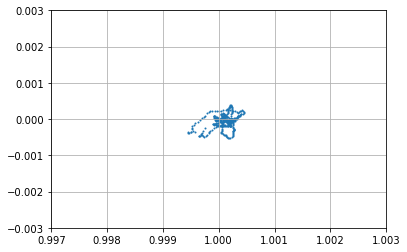

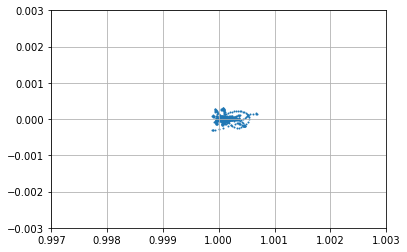

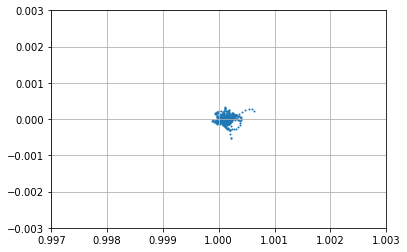

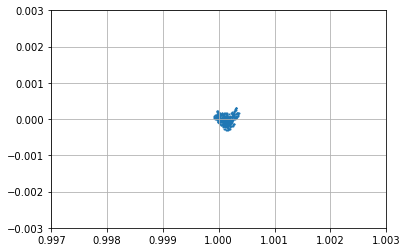

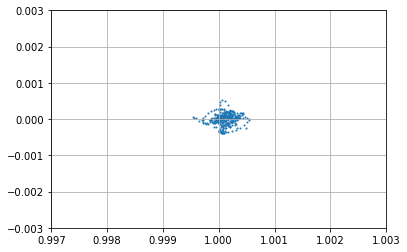

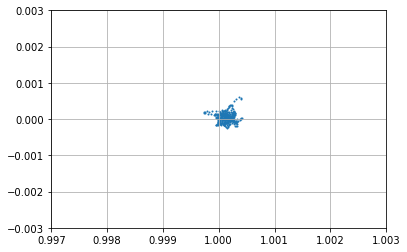

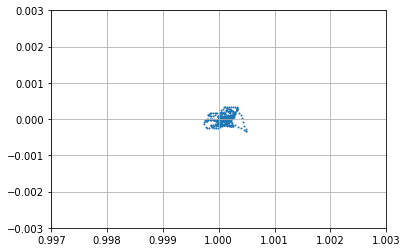

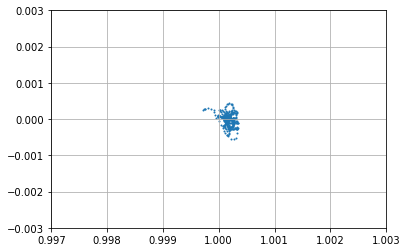

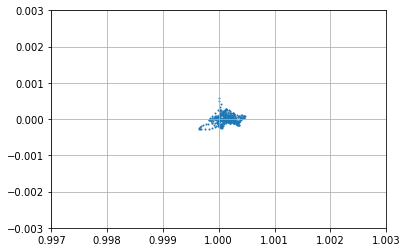

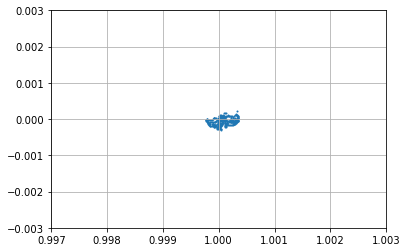

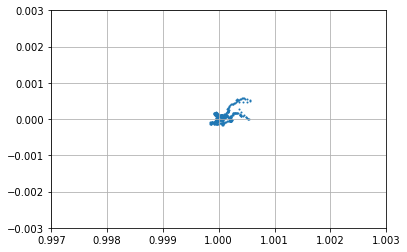

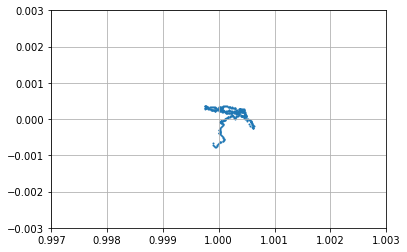

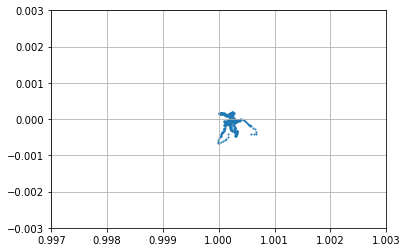

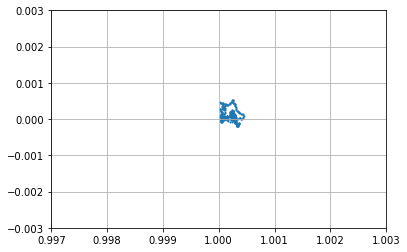

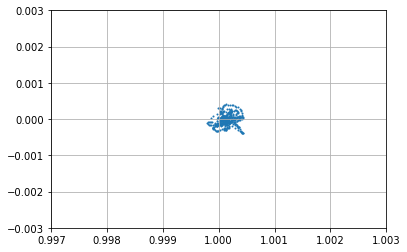

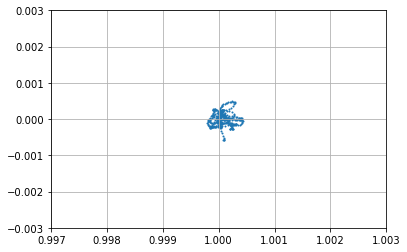

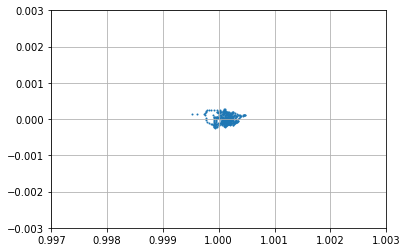

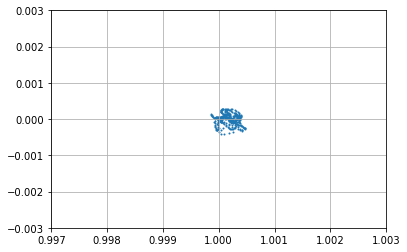

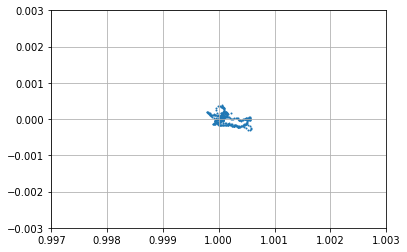

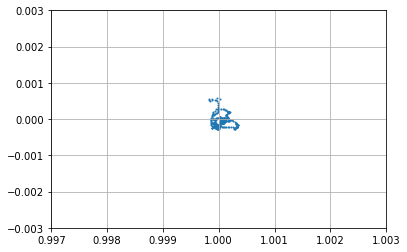

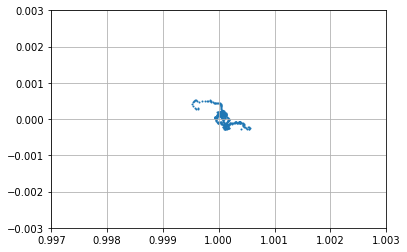

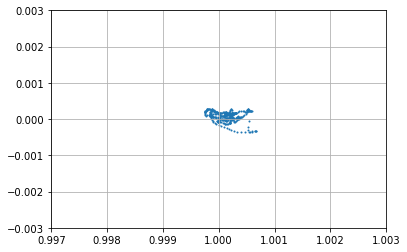

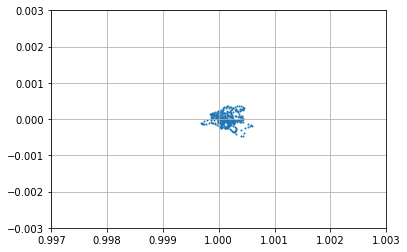

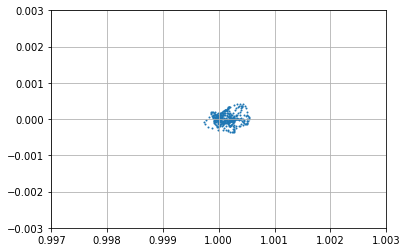

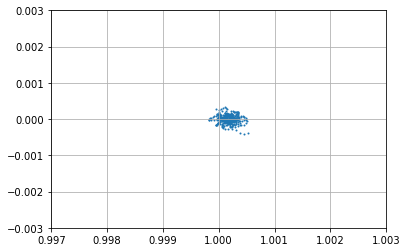

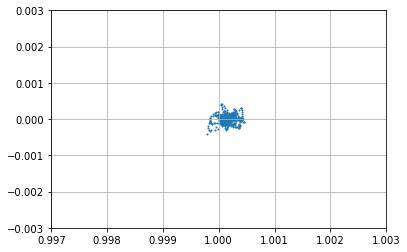

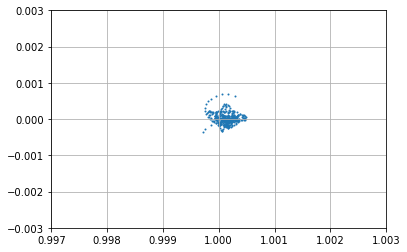

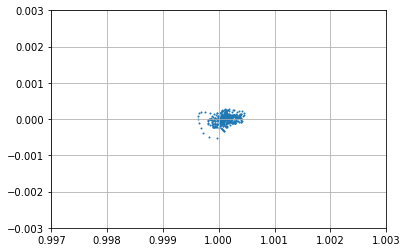

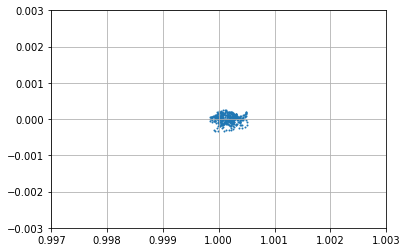

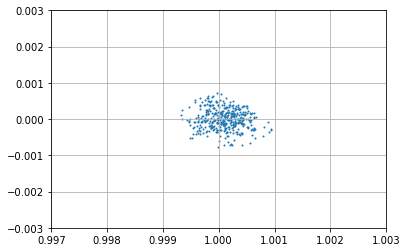

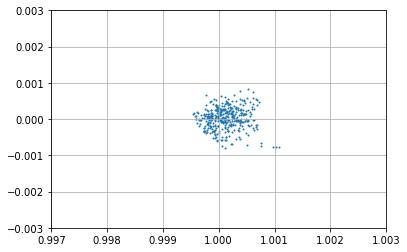

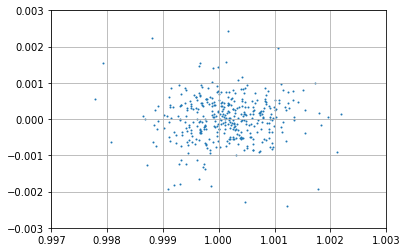

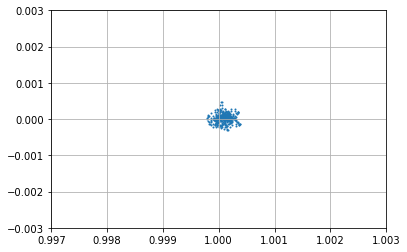

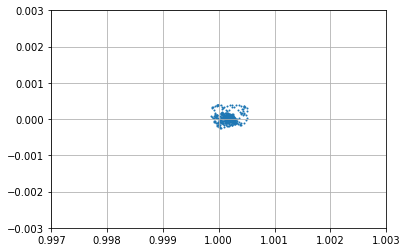

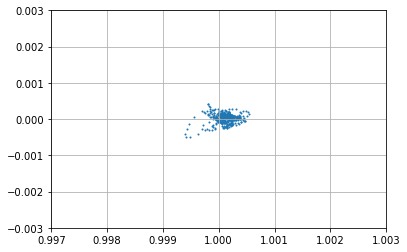

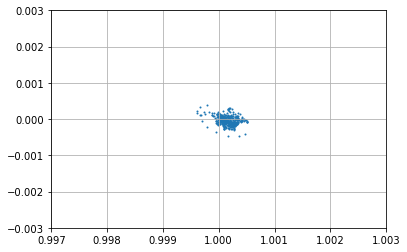

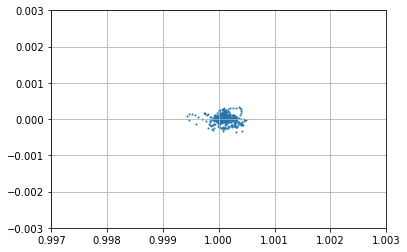

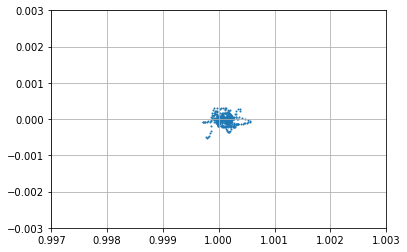

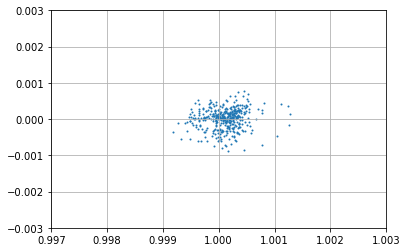

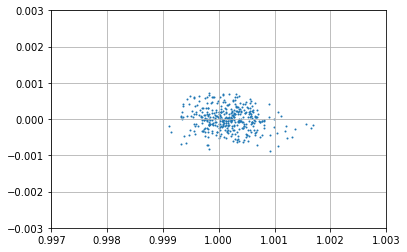

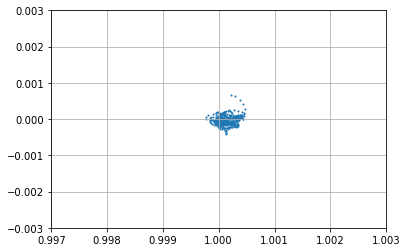

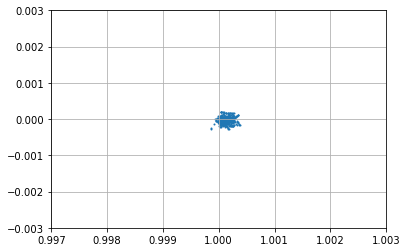

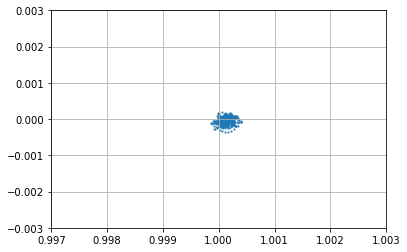

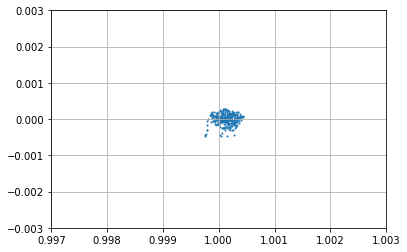

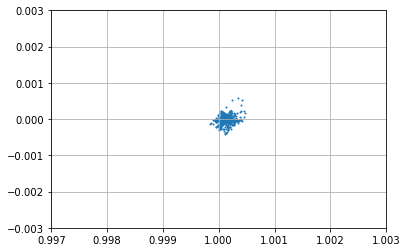

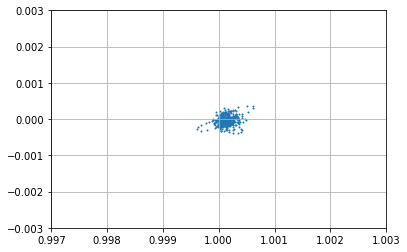

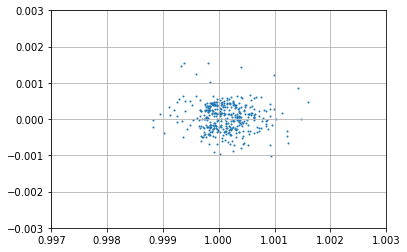

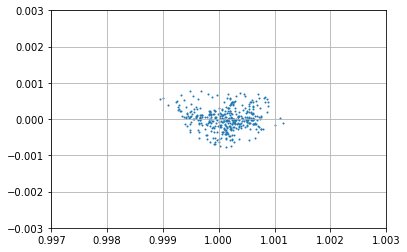

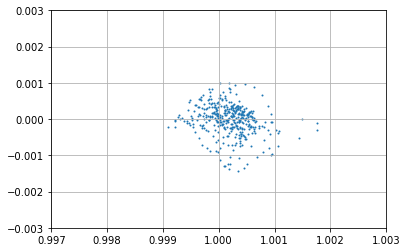

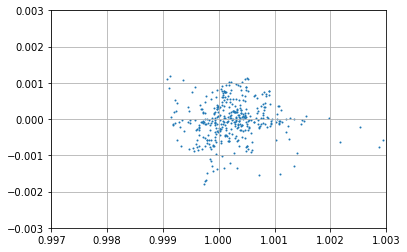

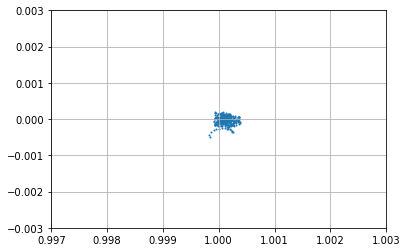

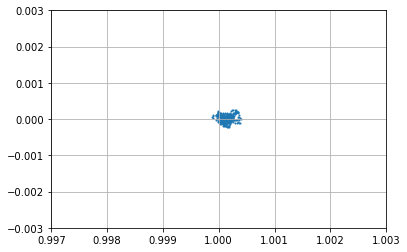

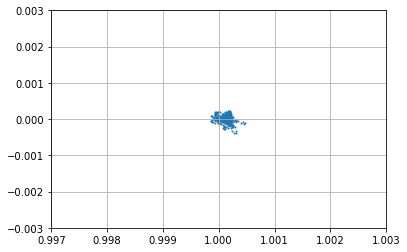

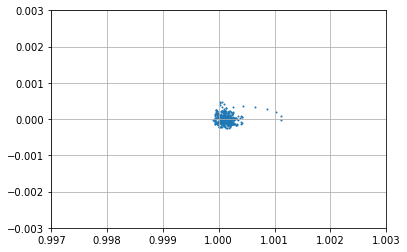

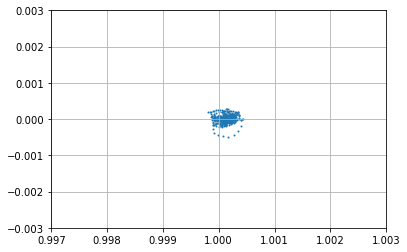

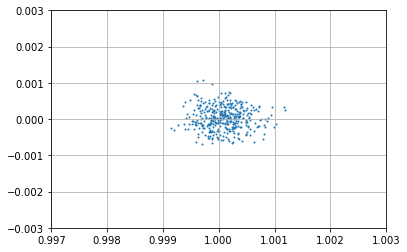

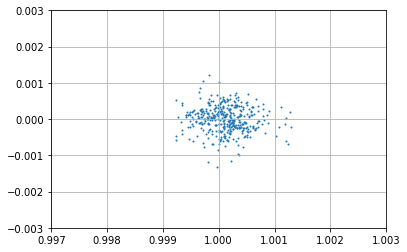

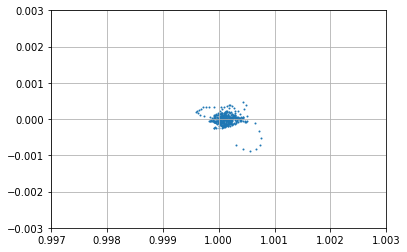

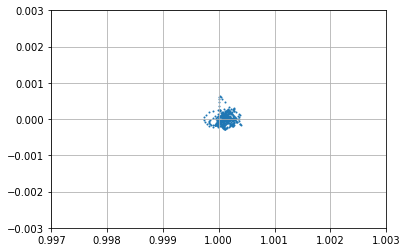

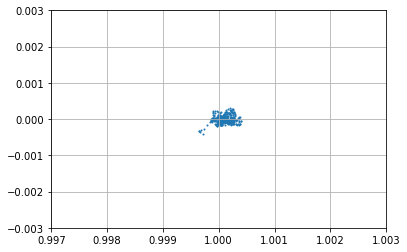

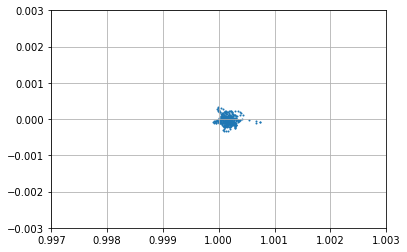

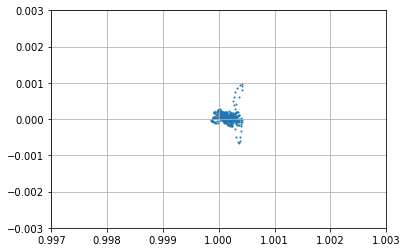

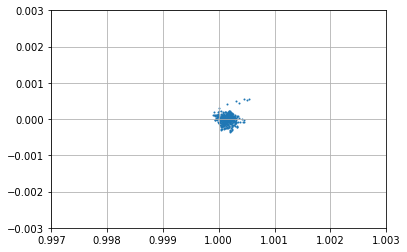

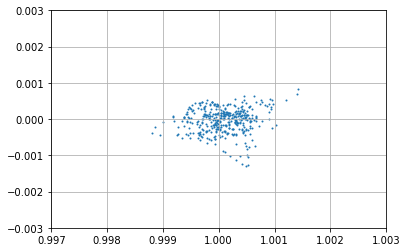

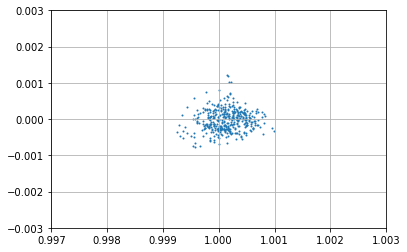

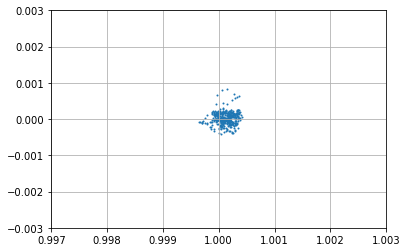

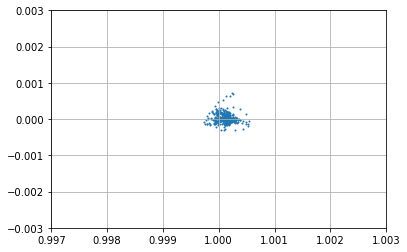

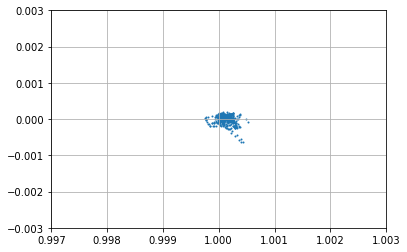

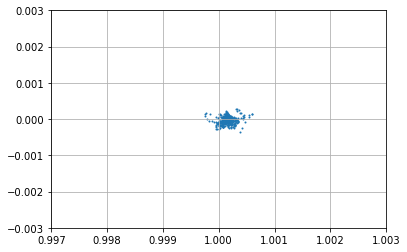

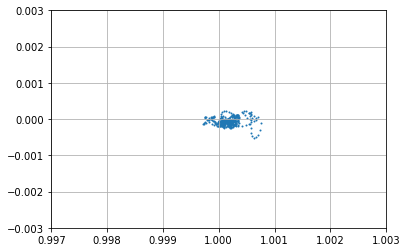

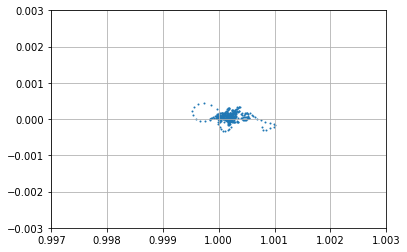

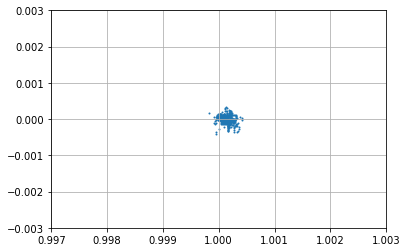

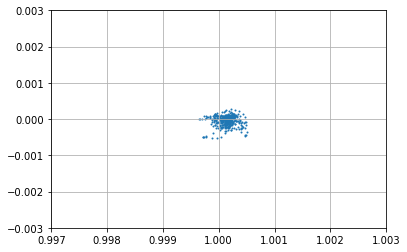

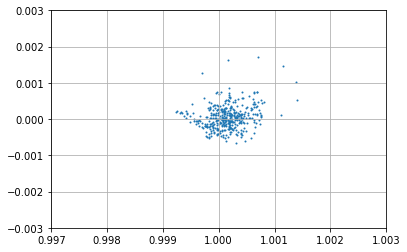

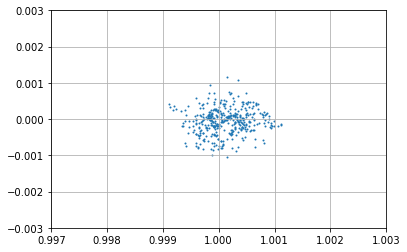

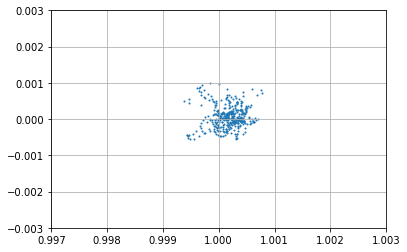

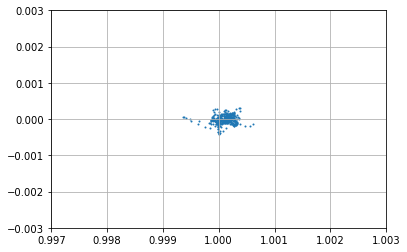

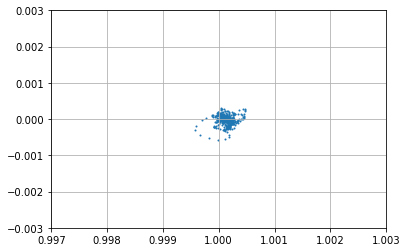

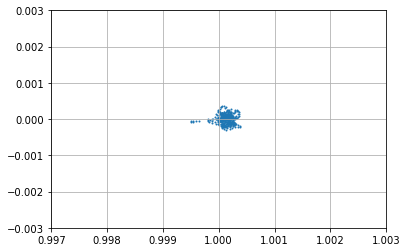

In [13]:
for ant in range(np.shape(cal_dw.gain_array)[0]):
    plt.scatter(
        np.real(cal_dw.gain_array[ant, 0, :, 0, 0]),
        np.imag(cal_dw.gain_array[ant, 0, :, 0, 0]),
        s=1
    )
    plt.xlim([1-3e-3, 1+3e-3])
    plt.ylim([-3e-3, 3e-3])
    plt.grid()
    plt.show()

In [14]:
np.shape(cal_dw.gain_array)

(127, 1, 384, 1, 1)

In [15]:
vanilla_calibrated_data = dwcal.apply_calibration(
    cal_vanilla,
    data_path="/Users/ruby/Astro/FHD_outputs/fhd_rlb_model_GLEAM_Apr2022",
    data_use_model=True,
    obsid="1061316296",
    pol="XX",
)
vanilla_calibrated_data.downsample_in_time(n_times_to_avg=int(vanilla_calibrated_data.Ntimes))
bl_flags = np.max(vanilla_calibrated_data.flag_array, axis=(1, 2, 3))
bl_inds_use = np.where(np.invert(bl_flags))[0]
if len(bl_inds_use) < vanilla_calibrated_data.Nblts:
    vanilla_calibrated_data.select(blt_inds=bl_inds_use)

Telescope location derived from obs lat/lon/alt values does not match the location in the layout file. Using the value from known_telescopes.
Fixing auto-correlations to be be real-only, after some imaginary values were detected in data_array.
Times do not match between UVData and UVCal but time_check is False, so calibration will be applied anyway.
UVData object does not have `x_orientation` specified but UVCal does. Matching based on `x` and `y` only 
There is a gap in the times of baseline (0, 0). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 1). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 2). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 3). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 4). The output may include averages across long time gaps.
There is a gap in the times

There is a gap in the times of baseline (6, 23). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 24). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 25). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 26). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 27). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 28). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 29). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 30). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 31). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 32). The output may 

There is a gap in the times of baseline (11, 77). The output may include averages across long time gaps.
There is a gap in the times of baseline (11, 78). The output may include averages across long time gaps.
There is a gap in the times of baseline (11, 79). The output may include averages across long time gaps.
There is a gap in the times of baseline (11, 80). The output may include averages across long time gaps.
There is a gap in the times of baseline (11, 81). The output may include averages across long time gaps.
There is a gap in the times of baseline (11, 82). The output may include averages across long time gaps.
There is a gap in the times of baseline (11, 83). The output may include averages across long time gaps.
There is a gap in the times of baseline (11, 84). The output may include averages across long time gaps.
There is a gap in the times of baseline (11, 85). The output may include averages across long time gaps.
There is a gap in the times of baseline (11, 86). The o

There is a gap in the times of baseline (18, 24). The output may include averages across long time gaps.
There is a gap in the times of baseline (18, 25). The output may include averages across long time gaps.
There is a gap in the times of baseline (18, 26). The output may include averages across long time gaps.
There is a gap in the times of baseline (18, 27). The output may include averages across long time gaps.
There is a gap in the times of baseline (18, 28). The output may include averages across long time gaps.
There is a gap in the times of baseline (18, 29). The output may include averages across long time gaps.
There is a gap in the times of baseline (18, 30). The output may include averages across long time gaps.
There is a gap in the times of baseline (18, 31). The output may include averages across long time gaps.
There is a gap in the times of baseline (18, 32). The output may include averages across long time gaps.
There is a gap in the times of baseline (18, 33). The o

There is a gap in the times of baseline (25, 43). The output may include averages across long time gaps.
There is a gap in the times of baseline (25, 44). The output may include averages across long time gaps.
There is a gap in the times of baseline (25, 45). The output may include averages across long time gaps.
There is a gap in the times of baseline (25, 46). The output may include averages across long time gaps.
There is a gap in the times of baseline (25, 47). The output may include averages across long time gaps.
There is a gap in the times of baseline (25, 48). The output may include averages across long time gaps.
There is a gap in the times of baseline (25, 49). The output may include averages across long time gaps.
There is a gap in the times of baseline (25, 50). The output may include averages across long time gaps.
There is a gap in the times of baseline (25, 51). The output may include averages across long time gaps.
There is a gap in the times of baseline (25, 52). The o

There is a gap in the times of baseline (32, 119). The output may include averages across long time gaps.
There is a gap in the times of baseline (32, 120). The output may include averages across long time gaps.
There is a gap in the times of baseline (32, 121). The output may include averages across long time gaps.
There is a gap in the times of baseline (32, 122). The output may include averages across long time gaps.
There is a gap in the times of baseline (32, 123). The output may include averages across long time gaps.
There is a gap in the times of baseline (32, 124). The output may include averages across long time gaps.
There is a gap in the times of baseline (32, 125). The output may include averages across long time gaps.
There is a gap in the times of baseline (32, 126). The output may include averages across long time gaps.
There is a gap in the times of baseline (32, 127). The output may include averages across long time gaps.
There is a gap in the times of baseline (33, 3

There is a gap in the times of baseline (41, 69). The output may include averages across long time gaps.
There is a gap in the times of baseline (41, 70). The output may include averages across long time gaps.
There is a gap in the times of baseline (41, 71). The output may include averages across long time gaps.
There is a gap in the times of baseline (41, 72). The output may include averages across long time gaps.
There is a gap in the times of baseline (41, 73). The output may include averages across long time gaps.
There is a gap in the times of baseline (41, 74). The output may include averages across long time gaps.
There is a gap in the times of baseline (41, 75). The output may include averages across long time gaps.
There is a gap in the times of baseline (41, 77). The output may include averages across long time gaps.
There is a gap in the times of baseline (41, 78). The output may include averages across long time gaps.
There is a gap in the times of baseline (41, 79). The o

There is a gap in the times of baseline (50, 98). The output may include averages across long time gaps.
There is a gap in the times of baseline (50, 99). The output may include averages across long time gaps.
There is a gap in the times of baseline (50, 100). The output may include averages across long time gaps.
There is a gap in the times of baseline (50, 101). The output may include averages across long time gaps.
There is a gap in the times of baseline (50, 102). The output may include averages across long time gaps.
There is a gap in the times of baseline (50, 103). The output may include averages across long time gaps.
There is a gap in the times of baseline (50, 104). The output may include averages across long time gaps.
There is a gap in the times of baseline (50, 105). The output may include averages across long time gaps.
There is a gap in the times of baseline (50, 106). The output may include averages across long time gaps.
There is a gap in the times of baseline (50, 107

There is a gap in the times of baseline (61, 72). The output may include averages across long time gaps.
There is a gap in the times of baseline (61, 73). The output may include averages across long time gaps.
There is a gap in the times of baseline (61, 74). The output may include averages across long time gaps.
There is a gap in the times of baseline (61, 75). The output may include averages across long time gaps.
There is a gap in the times of baseline (61, 77). The output may include averages across long time gaps.
There is a gap in the times of baseline (61, 78). The output may include averages across long time gaps.
There is a gap in the times of baseline (61, 79). The output may include averages across long time gaps.
There is a gap in the times of baseline (61, 80). The output may include averages across long time gaps.
There is a gap in the times of baseline (61, 81). The output may include averages across long time gaps.
There is a gap in the times of baseline (61, 82). The o

There is a gap in the times of baseline (73, 111). The output may include averages across long time gaps.
There is a gap in the times of baseline (73, 112). The output may include averages across long time gaps.
There is a gap in the times of baseline (73, 113). The output may include averages across long time gaps.
There is a gap in the times of baseline (73, 114). The output may include averages across long time gaps.
There is a gap in the times of baseline (73, 115). The output may include averages across long time gaps.
There is a gap in the times of baseline (73, 116). The output may include averages across long time gaps.
There is a gap in the times of baseline (73, 117). The output may include averages across long time gaps.
There is a gap in the times of baseline (73, 118). The output may include averages across long time gaps.
There is a gap in the times of baseline (73, 119). The output may include averages across long time gaps.
There is a gap in the times of baseline (73, 1

There is a gap in the times of baseline (90, 122). The output may include averages across long time gaps.
There is a gap in the times of baseline (90, 123). The output may include averages across long time gaps.
There is a gap in the times of baseline (90, 124). The output may include averages across long time gaps.
There is a gap in the times of baseline (90, 125). The output may include averages across long time gaps.
There is a gap in the times of baseline (90, 126). The output may include averages across long time gaps.
There is a gap in the times of baseline (90, 127). The output may include averages across long time gaps.
There is a gap in the times of baseline (91, 91). The output may include averages across long time gaps.
There is a gap in the times of baseline (91, 92). The output may include averages across long time gaps.
There is a gap in the times of baseline (91, 93). The output may include averages across long time gaps.
There is a gap in the times of baseline (91, 94).

In [16]:
dw_calibrated_data = dwcal.apply_calibration(
    cal_dw,
    data_path="/Users/ruby/Astro/FHD_outputs/fhd_rlb_model_GLEAM_Apr2022",
    data_use_model=True,
    obsid="1061316296",
    pol="XX",
)
dw_calibrated_data.downsample_in_time(n_times_to_avg=int(dw_calibrated_data.Ntimes))
bl_flags = np.max(dw_calibrated_data.flag_array, axis=(1, 2, 3))
bl_inds_use = np.where(np.invert(bl_flags))[0]
if len(bl_inds_use) < dw_calibrated_data.Nblts:
    dw_calibrated_data.select(blt_inds=bl_inds_use)

Telescope location derived from obs lat/lon/alt values does not match the location in the layout file. Using the value from known_telescopes.
Fixing auto-correlations to be be real-only, after some imaginary values were detected in data_array.
Times do not match between UVData and UVCal but time_check is False, so calibration will be applied anyway.
UVData object does not have `x_orientation` specified but UVCal does. Matching based on `x` and `y` only 
There is a gap in the times of baseline (0, 0). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 1). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 2). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 3). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 4). The output may include averages across long time gaps.
There is a gap in the times

There is a gap in the times of baseline (6, 16). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 17). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 18). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 19). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 20). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 21). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 22). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 23). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 24). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 25). The output may 

There is a gap in the times of baseline (12, 56). The output may include averages across long time gaps.
There is a gap in the times of baseline (12, 57). The output may include averages across long time gaps.
There is a gap in the times of baseline (12, 58). The output may include averages across long time gaps.
There is a gap in the times of baseline (12, 59). The output may include averages across long time gaps.
There is a gap in the times of baseline (12, 60). The output may include averages across long time gaps.
There is a gap in the times of baseline (12, 61). The output may include averages across long time gaps.
There is a gap in the times of baseline (12, 62). The output may include averages across long time gaps.
There is a gap in the times of baseline (12, 63). The output may include averages across long time gaps.
There is a gap in the times of baseline (12, 64). The output may include averages across long time gaps.
There is a gap in the times of baseline (12, 65). The o

There is a gap in the times of baseline (19, 42). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 43). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 44). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 45). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 46). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 47). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 48). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 49). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 50). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 51). The o

There is a gap in the times of baseline (26, 75). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 77). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 78). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 79). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 80). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 81). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 82). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 83). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 84). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 85). The o

There is a gap in the times of baseline (34, 62). The output may include averages across long time gaps.
There is a gap in the times of baseline (34, 63). The output may include averages across long time gaps.
There is a gap in the times of baseline (34, 64). The output may include averages across long time gaps.
There is a gap in the times of baseline (34, 65). The output may include averages across long time gaps.
There is a gap in the times of baseline (34, 66). The output may include averages across long time gaps.
There is a gap in the times of baseline (34, 67). The output may include averages across long time gaps.
There is a gap in the times of baseline (34, 68). The output may include averages across long time gaps.
There is a gap in the times of baseline (34, 69). The output may include averages across long time gaps.
There is a gap in the times of baseline (34, 70). The output may include averages across long time gaps.
There is a gap in the times of baseline (34, 71). The o

There is a gap in the times of baseline (42, 120). The output may include averages across long time gaps.
There is a gap in the times of baseline (42, 121). The output may include averages across long time gaps.
There is a gap in the times of baseline (42, 122). The output may include averages across long time gaps.
There is a gap in the times of baseline (42, 123). The output may include averages across long time gaps.
There is a gap in the times of baseline (42, 124). The output may include averages across long time gaps.
There is a gap in the times of baseline (42, 125). The output may include averages across long time gaps.
There is a gap in the times of baseline (42, 126). The output may include averages across long time gaps.
There is a gap in the times of baseline (42, 127). The output may include averages across long time gaps.
There is a gap in the times of baseline (43, 43). The output may include averages across long time gaps.
There is a gap in the times of baseline (43, 44

There is a gap in the times of baseline (52, 71). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 72). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 73). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 74). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 75). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 77). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 78). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 79). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 80). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 81). The o

There is a gap in the times of baseline (63, 72). The output may include averages across long time gaps.
There is a gap in the times of baseline (63, 73). The output may include averages across long time gaps.
There is a gap in the times of baseline (63, 74). The output may include averages across long time gaps.
There is a gap in the times of baseline (63, 75). The output may include averages across long time gaps.
There is a gap in the times of baseline (63, 77). The output may include averages across long time gaps.
There is a gap in the times of baseline (63, 78). The output may include averages across long time gaps.
There is a gap in the times of baseline (63, 79). The output may include averages across long time gaps.
There is a gap in the times of baseline (63, 80). The output may include averages across long time gaps.
There is a gap in the times of baseline (63, 81). The output may include averages across long time gaps.
There is a gap in the times of baseline (63, 82). The o

There is a gap in the times of baseline (77, 86). The output may include averages across long time gaps.
There is a gap in the times of baseline (77, 87). The output may include averages across long time gaps.
There is a gap in the times of baseline (77, 88). The output may include averages across long time gaps.
There is a gap in the times of baseline (77, 89). The output may include averages across long time gaps.
There is a gap in the times of baseline (77, 90). The output may include averages across long time gaps.
There is a gap in the times of baseline (77, 91). The output may include averages across long time gaps.
There is a gap in the times of baseline (77, 92). The output may include averages across long time gaps.
There is a gap in the times of baseline (77, 93). The output may include averages across long time gaps.
There is a gap in the times of baseline (77, 94). The output may include averages across long time gaps.
There is a gap in the times of baseline (77, 95). The o

There is a gap in the times of baseline (95, 97). The output may include averages across long time gaps.
There is a gap in the times of baseline (95, 98). The output may include averages across long time gaps.
There is a gap in the times of baseline (95, 99). The output may include averages across long time gaps.
There is a gap in the times of baseline (95, 100). The output may include averages across long time gaps.
There is a gap in the times of baseline (95, 101). The output may include averages across long time gaps.
There is a gap in the times of baseline (95, 102). The output may include averages across long time gaps.
There is a gap in the times of baseline (95, 103). The output may include averages across long time gaps.
There is a gap in the times of baseline (95, 104). The output may include averages across long time gaps.
There is a gap in the times of baseline (95, 105). The output may include averages across long time gaps.
There is a gap in the times of baseline (95, 106)

In [17]:
cal_perfect = cal_dw.copy()
cal_perfect.gain_array[:, :, :, :, :] = 1.
perfectly_calibrated_data = dwcal.apply_calibration(
    cal_perfect,
    data_path="/Users/ruby/Astro/FHD_outputs/fhd_rlb_model_GLEAM_Apr2022",
    data_use_model=True,
    obsid="1061316296",
    pol="XX",
)
perfectly_calibrated_data.downsample_in_time(n_times_to_avg=int(perfectly_calibrated_data.Ntimes))
bl_flags = np.max(perfectly_calibrated_data.flag_array, axis=(1, 2, 3))
bl_inds_use = np.where(np.invert(bl_flags))[0]
if len(bl_inds_use) < perfectly_calibrated_data.Nblts:
    perfectly_calibrated_data.select(blt_inds=bl_inds_use)

Telescope location derived from obs lat/lon/alt values does not match the location in the layout file. Using the value from known_telescopes.
Fixing auto-correlations to be be real-only, after some imaginary values were detected in data_array.
Times do not match between UVData and UVCal but time_check is False, so calibration will be applied anyway.
UVData object does not have `x_orientation` specified but UVCal does. Matching based on `x` and `y` only 
There is a gap in the times of baseline (0, 0). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 1). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 2). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 3). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 4). The output may include averages across long time gaps.
There is a gap in the times

There is a gap in the times of baseline (6, 30). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 31). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 32). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 33). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 34). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 35). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 36). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 37). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 38). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 39). The output may 

There is a gap in the times of baseline (12, 67). The output may include averages across long time gaps.
There is a gap in the times of baseline (12, 68). The output may include averages across long time gaps.
There is a gap in the times of baseline (12, 69). The output may include averages across long time gaps.
There is a gap in the times of baseline (12, 70). The output may include averages across long time gaps.
There is a gap in the times of baseline (12, 71). The output may include averages across long time gaps.
There is a gap in the times of baseline (12, 72). The output may include averages across long time gaps.
There is a gap in the times of baseline (12, 73). The output may include averages across long time gaps.
There is a gap in the times of baseline (12, 74). The output may include averages across long time gaps.
There is a gap in the times of baseline (12, 75). The output may include averages across long time gaps.
There is a gap in the times of baseline (12, 77). The o

There is a gap in the times of baseline (19, 57). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 58). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 59). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 60). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 61). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 62). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 63). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 64). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 65). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 66). The o

There is a gap in the times of baseline (26, 95). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 96). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 97). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 98). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 99). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 100). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 101). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 102). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 103). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 104). 

There is a gap in the times of baseline (34, 93). The output may include averages across long time gaps.
There is a gap in the times of baseline (34, 94). The output may include averages across long time gaps.
There is a gap in the times of baseline (34, 95). The output may include averages across long time gaps.
There is a gap in the times of baseline (34, 96). The output may include averages across long time gaps.
There is a gap in the times of baseline (34, 97). The output may include averages across long time gaps.
There is a gap in the times of baseline (34, 98). The output may include averages across long time gaps.
There is a gap in the times of baseline (34, 99). The output may include averages across long time gaps.
There is a gap in the times of baseline (34, 100). The output may include averages across long time gaps.
There is a gap in the times of baseline (34, 101). The output may include averages across long time gaps.
There is a gap in the times of baseline (34, 102). Th

There is a gap in the times of baseline (43, 69). The output may include averages across long time gaps.
There is a gap in the times of baseline (43, 70). The output may include averages across long time gaps.
There is a gap in the times of baseline (43, 71). The output may include averages across long time gaps.
There is a gap in the times of baseline (43, 72). The output may include averages across long time gaps.
There is a gap in the times of baseline (43, 73). The output may include averages across long time gaps.
There is a gap in the times of baseline (43, 74). The output may include averages across long time gaps.
There is a gap in the times of baseline (43, 75). The output may include averages across long time gaps.
There is a gap in the times of baseline (43, 77). The output may include averages across long time gaps.
There is a gap in the times of baseline (43, 78). The output may include averages across long time gaps.
There is a gap in the times of baseline (43, 79). The o

There is a gap in the times of baseline (52, 113). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 114). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 115). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 116). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 117). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 118). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 119). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 120). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 121). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 1

There is a gap in the times of baseline (63, 122). The output may include averages across long time gaps.
There is a gap in the times of baseline (63, 123). The output may include averages across long time gaps.
There is a gap in the times of baseline (63, 124). The output may include averages across long time gaps.
There is a gap in the times of baseline (63, 125). The output may include averages across long time gaps.
There is a gap in the times of baseline (63, 126). The output may include averages across long time gaps.
There is a gap in the times of baseline (63, 127). The output may include averages across long time gaps.
There is a gap in the times of baseline (64, 64). The output may include averages across long time gaps.
There is a gap in the times of baseline (64, 65). The output may include averages across long time gaps.
There is a gap in the times of baseline (64, 66). The output may include averages across long time gaps.
There is a gap in the times of baseline (64, 67).

There is a gap in the times of baseline (78, 101). The output may include averages across long time gaps.
There is a gap in the times of baseline (78, 102). The output may include averages across long time gaps.
There is a gap in the times of baseline (78, 103). The output may include averages across long time gaps.
There is a gap in the times of baseline (78, 104). The output may include averages across long time gaps.
There is a gap in the times of baseline (78, 105). The output may include averages across long time gaps.
There is a gap in the times of baseline (78, 106). The output may include averages across long time gaps.
There is a gap in the times of baseline (78, 107). The output may include averages across long time gaps.
There is a gap in the times of baseline (78, 108). The output may include averages across long time gaps.
There is a gap in the times of baseline (78, 109). The output may include averages across long time gaps.
There is a gap in the times of baseline (78, 1

There is a gap in the times of baseline (97, 109). The output may include averages across long time gaps.
There is a gap in the times of baseline (97, 110). The output may include averages across long time gaps.
There is a gap in the times of baseline (97, 111). The output may include averages across long time gaps.
There is a gap in the times of baseline (97, 112). The output may include averages across long time gaps.
There is a gap in the times of baseline (97, 113). The output may include averages across long time gaps.
There is a gap in the times of baseline (97, 114). The output may include averages across long time gaps.
There is a gap in the times of baseline (97, 115). The output may include averages across long time gaps.
There is a gap in the times of baseline (97, 116). The output may include averages across long time gaps.
There is a gap in the times of baseline (97, 117). The output may include averages across long time gaps.
There is a gap in the times of baseline (97, 1

In [18]:
vanilla_calibrated_data.diff_vis(perfectly_calibrated_data, inplace=True)

In [19]:
dw_calibrated_data.diff_vis(perfectly_calibrated_data, inplace=True)

In [29]:
def fft_visibilities(uv):
    delay_array = np.fft.fftfreq(uv.Nfreqs, d=uv.channel_width)
    delay_array = np.fft.fftshift(delay_array)
    fft_abs = np.abs(np.fft.fftshift(np.fft.fft(uv.data_array, axis=2), axes=2))
    return fft_abs, delay_array


def calculate_binned_rms(vis_array, uvw_array, Nfreqs, nbins=100, min_val=None, max_val=None):
    
    bl_lengths = np.sqrt(np.sum(uvw_array ** 2.0, axis=1))
    if min_val is None:
        min_val = np.min(bl_lengths)
    if max_val is None:
        max_val = np.max(bl_lengths)
    bl_bin_edges = np.linspace(min_val, max_val, num=nbins+1)
    binned_rms_squared = np.full([nbins, Nfreqs], np.nan, dtype="float")
    for bin_ind in range(nbins):
        bl_inds = np.where((bl_lengths > bl_bin_edges[bin_ind]) & (bl_lengths <= bl_bin_edges[bin_ind+1]))[0]
        if len(bl_inds) > 0:
            binned_rms_squared[bin_ind, :] = np.mean(vis_array[bl_inds, 0, :, 0]**2., axis=0)
            
    binned_rms = binned_rms_squared**.5
    return binned_rms, bl_bin_edges
    

def plot_delay_spectra(
    binned_delay_spec, bin_edges, delay_array,
    title="", add_lines=[], vmin=None, vmax=None, diverging_colorbar=False, c=3e8
):
    
    # Plot
    if diverging_colorbar:
        use_cmap = matplotlib.cm.get_cmap('seismic').copy()
    else:
        use_cmap = matplotlib.cm.get_cmap('plasma').copy()
    if vmin is not None:
        if vmin < 0:
            norm = matplotlib.colors.SymLogNorm(linthresh=1e-3, vmin=vmin, vmax=vmax)
        else:
            norm = matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax)
    else:
        if np.min(binned_delay_spec) < 0:
            norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax)
        else:
            norm = matplotlib.colors.LogNorm(linthresh=1e-3, vmin=vmin, vmax=vmax)
    use_cmap.set_bad(color='whitesmoke')
    plt.imshow(
        binned_delay_spec.T, origin='lower', interpolation='none', cmap=use_cmap, 
        norm=norm,
        extent=[
            np.min(bin_edges), np.max(bin_edges),
            np.min(delay_array), np.max(delay_array)
        ],
        aspect='auto',
    )
    
    for line_slope in add_lines:
        plt.plot(
            [np.min(bin_edges), np.max(bin_edges)],
            [np.min(bin_edges)/c*line_slope, np.max(bin_edges)/c*line_slope],
            "--",
            color="white",
            linewidth=.5,
        )
        plt.plot(
            [np.min(bin_edges), np.max(bin_edges)],
            [np.min(bin_edges)/c*line_slope, -np.max(bin_edges)/c*line_slope],
            "--",
            color="white",
            linewidth=.5,
        )
    
    cbar = plt.colorbar(extend="both")
    cbar.ax.set_ylabel(
        "Visibility RMS", rotation=270, labelpad=15
    )
    plt.xlabel('Baseline Length (m)')
    plt.ylim([-2e-6,2e-6])
    plt.ylabel('Delay (s)')
    plt.title(title)
    plt.show()
    plt.close()

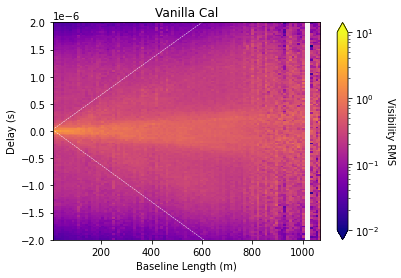

In [22]:
fft_abs_vanilla_cal, delay_array = fft_visibilities(vanilla_calibrated_data)
binned_delay_spec_vanilla, bin_edges = calculate_binned_rms(fft_abs_vanilla_cal, vanilla_calibrated_data.uvw_array, vanilla_calibrated_data.Nfreqs)
plot_delay_spectra(binned_delay_spec_vanilla, bin_edges, delay_array, title="Vanilla Cal", add_lines=[1.], vmin=1e-2, vmax=1e1)

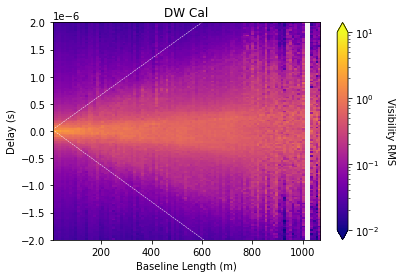

In [24]:
fft_abs_dw_cal, delay_array = fft_visibilities(dw_calibrated_data)
binned_delay_spec_dw, bin_edges = calculate_binned_rms(fft_abs_dw_cal, dw_calibrated_data.uvw_array, dw_calibrated_data.Nfreqs)
plot_delay_spectra(binned_delay_spec_dw, bin_edges, delay_array, title="DW Cal", add_lines=[1.], vmin=1e-2, vmax=1e1)

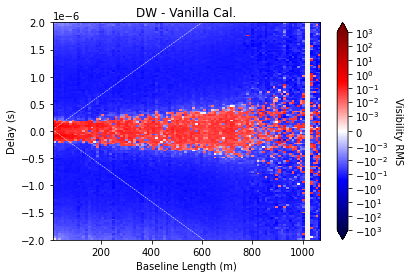

In [31]:
plot_delay_spectra(
    binned_delay_spec_dw-binned_delay_spec_vanilla, bin_edges, delay_array,
    title="DW - Vanilla Cal.", add_lines=[1.], vmin=-1e3, vmax=1e3,
    diverging_colorbar=True
)

# Look at the case of randomized initial gains

In [32]:
cal_vanilla_randomized = pyuvdata.UVCal()
cal_vanilla_randomized.read_calfits('/Users/ruby/Astro/dwcal_tests_Apr2022/random_gains_test_Apr25/vanilla_cal.calfits')
cal_dw_randomized = pyuvdata.UVCal()
cal_dw_randomized.read_calfits('/Users/ruby/Astro/dwcal_tests_Apr2022/random_gains_test_Apr25/wedge_excluded.calfits')
randomized_gains = pyuvdata.UVCal()
randomized_gains.read_calfits('/Users/ruby/Astro/dwcal_tests_Apr2022/random_gains_test_Apr25/random_initial_gains.calfits')

telescope_location is not set. Using known values for mwa.


In [48]:
cal_vanilla_gain_error = cal_vanilla_randomized.copy()
cal_vanilla_ant_names = cal_vanilla_randomized.antenna_names[cal_vanilla_randomized.ant_array]
true_gains_ant_names = randomized_gains.antenna_names[randomized_gains.ant_array]
for ant_ind, ant_name in enumerate(cal_vanilla_ant_names):
    fit_gains = cal_vanilla_randomized.gain_array[ant_ind, :, :, :, :]
    true_gains = randomized_gains.gain_array[np.where(true_gains_ant_names == ant_name)[0][0], :, :, :, :]
    cal_vanilla_gain_error.gain_array[ant_ind, :, :, :, :] = fit_gains-true_gains

In [62]:
dwcal_gain_error = cal_dw_randomized.copy()
dwcal_ant_names = cal_dw_randomized.antenna_names[cal_dw_randomized.ant_array]
for ant_ind, ant_name in enumerate(dwcal_ant_names):
    fit_gains = cal_dw_randomized.gain_array[ant_ind, :, :, :, :]
    true_gains = randomized_gains.gain_array[np.where(true_gains_ant_names == ant_name)[0][0], :, :, :, :]
    dwcal_gain_error.gain_array[ant_ind, :, :, :, :] = fit_gains-true_gains

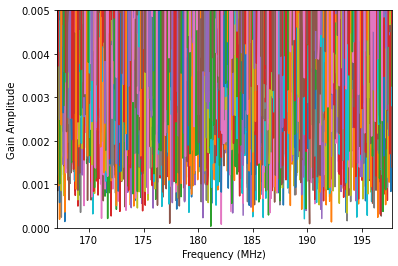

In [68]:
randomized_gains_dev = randomized_gains.copy()
randomized_gains_dev.gain_array -= 1
plot_gains_error_per_freq(randomized_gains_dev, title="")

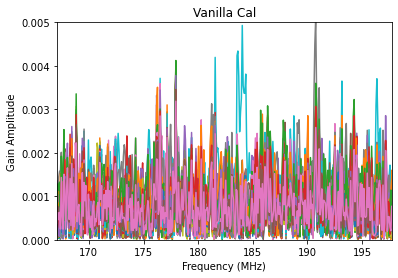

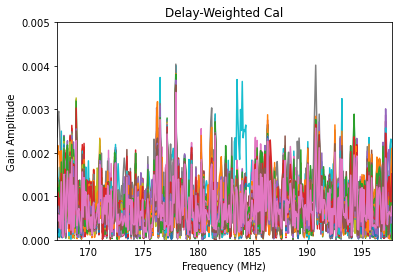

In [63]:
plot_gains_error_per_freq(cal_vanilla_gain_error, title="Vanilla Cal")
plot_gains_error_per_freq(dwcal_gain_error, title="Delay-Weighted Cal")

Average amplitude: 0.01659910828201735


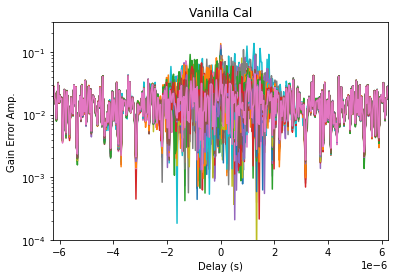

Average amplitude: 0.016238475912781485


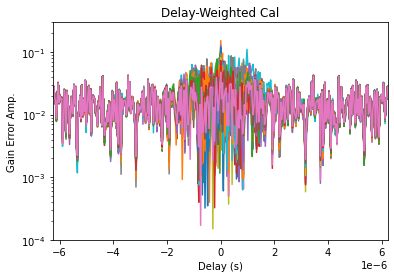

In [67]:
plot_gains_error_delay(cal_vanilla_gain_error, title="Vanilla Cal")
plot_gains_error_delay(dwcal_gain_error, title="Delay-Weighted Cal")